In [1]:
from cProfile import label

import numpy as np
from sympy.codegen.ast import break_

from farich_functions import *

In [2]:
warnings.filterwarnings("ignore")


In [3]:
def enforce_float32(df):
    return df.astype({col: np.float32 for col in df.select_dtypes(include=['float64']).columns})

In [4]:
idf = pd.DataFrame()
idf['W'] = [35.]
# idf['W'] = [40.]

idf['zdis'] = [800.]
idf['distance'] = [205.]  # 200
idf['n_mean'] = [1.04511]
# 
# idf['n_mean'] = [1.0502]

idf['pixel_size'] = [3.16]
mu_mass = 105.65
pi_mass = 139.57
ka_mass = 493.68

In [5]:
3.36 / np.sqrt(12)

0.9699484522385713

In [6]:
ps = np.linspace(500, 7000, 100)
beta2= np.array([beta_from_momentum(p, pi_mass) for p in ps])
beta1 = np.array([beta_from_momentum(p, mu_mass) for p in ps])

np.array(list(zip(200 * np.tan(np.arccos(1 / 1.045 / beta1)) - 200 * np.tan(np.arccos(1 / 1.045 / beta2)), ps))) # 1800 - lim mu/pi

array([[1.97132375e+01, 5.00000000e+02],
       [1.27275751e+01, 5.65656566e+02],
       [9.34470427e+00, 6.31313131e+02],
       [7.27358679e+00, 6.96969697e+02],
       [5.86860391e+00, 7.62626263e+02],
       [4.85589829e+00, 8.28282828e+02],
       [4.09522850e+00, 8.93939394e+02],
       [3.50624078e+00, 9.59595960e+02],
       [3.03928126e+00, 1.02525253e+03],
       [2.66193816e+00, 1.09090909e+03],
       [2.35214944e+00, 1.15656566e+03],
       [2.09438978e+00, 1.22222222e+03],
       [1.87743235e+00, 1.28787879e+03],
       [1.69297157e+00, 1.35353535e+03],
       [1.53474249e+00, 1.41919192e+03],
       [1.39793930e+00, 1.48484848e+03],
       [1.27882083e+00, 1.55050505e+03],
       [1.17443650e+00, 1.61616162e+03],
       [1.08243202e+00, 1.68181818e+03],
       [1.00090913e+00, 1.74747475e+03],
       [9.28322726e-01, 1.81313131e+03],
       [8.63404234e-01, 1.87878788e+03],
       [8.05103903e-01, 1.94444444e+03],
       [7.52546727e-01, 2.01010101e+03],
       [7.049984

In [7]:
ps = np.linspace(1800, 10000, 100)
beta2= np.array([beta_from_momentum(p, ka_mass) for p in ps])
beta1 = np.array([beta_from_momentum(p, pi_mass) for p in ps])

np.array(list(zip(200 * np.tan(np.arccos(1 / 1.045 / beta1)) - 200 * np.tan(np.arccos(1 / 1.045 / beta2)), ps))) # 9000 - lim ka/pi

array([[3.34784924e+01, 1.80000000e+03],
       [2.91561040e+01, 1.88282828e+03],
       [2.58349014e+01, 1.96565657e+03],
       [2.31616297e+01, 2.04848485e+03],
       [2.09472604e+01, 2.13131313e+03],
       [1.90761901e+01, 2.21414141e+03],
       [1.74716003e+01, 2.29696970e+03],
       [1.60794711e+01, 2.37979798e+03],
       [1.48602212e+01, 2.46262626e+03],
       [1.37839311e+01, 2.54545455e+03],
       [1.28274239e+01, 2.62828283e+03],
       [1.19723879e+01, 2.71111111e+03],
       [1.12041174e+01, 2.79393939e+03],
       [1.05106393e+01, 2.87676768e+03],
       [9.88209045e+00, 2.95959596e+03],
       [9.31026287e+00, 3.04242424e+03],
       [8.78826479e+00, 3.12525253e+03],
       [8.31026378e+00, 3.20808081e+03],
       [7.87128897e+00, 3.29090909e+03],
       [7.46707682e+00, 3.37373737e+03],
       [7.09394928e+00, 3.45656566e+03],
       [6.74871677e+00, 3.53939394e+03],
       [6.42859985e+00, 3.62222222e+03],
       [6.13116575e+00, 3.70505051e+03],
       [5.854276

In [8]:
beta_from_momentum(1100, pi_mass)

0.9920464079310007

In [9]:
beta_from_momentum(4000, ka_mass)

0.9924696726833222

In [10]:
momentum_from_beta(np.linspace(beta_from_momentum(1800, ka_mass), beta_from_momentum(4000, ka_mass), 11), ka_mass)

array([1800.        , 1879.58217268, 1969.89972231, 2073.64961415,
       2194.5862256 , 2338.12252414, 2512.41000946, 2730.42505163,
       3014.3986574 , 3406.50985363, 4000.        ])

In [11]:
momentum_from_beta(np.linspace(beta_from_momentum(500, pi_mass), beta_from_momentum(4000, pi_mass), 11), pi_mass)

array([ 500.        ,  528.05624494,  561.0273146 ,  600.56772063,
        649.23616937,  711.25021599,  794.18844923,  913.46892906,
       1107.26446752, 1512.69719794, 4000.        ])

In [12]:
mu_pi_old = False
pi_ka_old = False
mu_pi_ka = True

In [13]:
if mu_pi_old:
    edf, bdf, gdf = create_edf('fullsim_optical_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None,
                               uncertain_angle=False, is_mu=False, num_of_files=11)
    edf_mu, bdf_mu, gdf_mu = create_edf('fullsim_optical_2000_mu_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None,
                                        uncertain_angle=False, is_mu=True, num_of_files=11)
    
    shift_ind = np.array(edf.index.get_level_values(0))[-1] + 1
    new_index = edf_mu.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_mu.index = pd.MultiIndex.from_tuples(new_index, names=edf.index.names)
    gdf_mu.index = np.array(gdf_mu.index) + np.array(gdf.index)[-1] + 1
    
    edf_conc = pd.concat([edf, edf_mu])
    gdf_conc = pd.concat([gdf, gdf_mu])
    
    edf = edf_mu = gdf = gdf_mu = 0
    edf_conc = enforce_float32(edf_conc)
    # 
    # sample_ind = np.random.choice(gdf_conc.index, size=20000, replace=False)
    # edf_conc = edf_conc.loc[sample_ind]
    # gdf_conc = gdf_conc.loc[sample_ind]
    # 
    # index_map = dict(zip(np.array(gdf_conc.index), np.linspace(0, 19999, 20000, dtype=np.int16)))
    # new_new_index = edf_conc.index.map(lambda idx: (index_map[idx[0]], idx[1]))
    # edf_conc.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_conc.index.names)
    # gdf_conc.index = np.linspace(0, 19999, 20000, dtype=np.int16)

In [14]:
if pi_ka_old:
    edf, bdf, gdf = create_edf('fullsim_optical_2000_pi2_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                               uncertain_angle=False, is_mu=False, is_ka=False)
    edf_ka, bdf_ka, gdf_ka = create_edf('fullsim_optical_2000_ka_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                                    uncertain_angle=False, is_mu=False, is_ka=True)
    
    shift_ind = np.array(edf.index.get_level_values(0))[-1] + 1
    new_index = edf_ka.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_ka.index = pd.MultiIndex.from_tuples(new_index, names=edf.index.names)
    gdf_ka.index = np.array(gdf_ka.index) + np.array(gdf.index)[-1] + 1

    edf_conc = pd.concat([edf, edf_ka])
    gdf_conc = pd.concat([gdf, gdf_ka])
    
    edf = gdf = edf_ka = gdf_ka = 0
    edf_conc = enforce_float32(edf_conc)
    # sample_ind = np.random.choice(gdf_conc.index, size=20000, replace=False)
    # edf_conc = edf_conc.loc[sample_ind]
    # gdf_conc = gdf_conc.loc[sample_ind]
    # index_map = dict(zip(np.array(gdf_conc.index), np.linspace(0, 19999, 20000, dtype=np.int16)))
    # new_new_index = edf_conc.index.map(lambda idx: (index_map[idx[0]], idx[1]))
    # edf_conc.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_conc.index.names)
    # gdf_conc.index = np.linspace(0, 19999, 20000, dtype=np.int16)

In [15]:
if mu_pi_ka:
    edf_mu, bdf_mu, gdf_mu = create_edf('fullsim_3particles_2000_mu_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                               uncertain_angle=False, is_mu=True, is_ka=False)
    edf_pi, bdf_pi, gdf_pi = create_edf('fullsim_3particles_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                               uncertain_angle=False, is_mu=False, is_ka=False)
    edf_ka, bdf_ka, gdf_ka = create_edf('fullsim_3particles_2000_ka_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                                    uncertain_angle=False, is_mu=False, is_ka=True)
    
    shift_ind = np.array(edf_mu.index.get_level_values(0))[-1] + 1
    new_index = edf_pi.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_pi.index = pd.MultiIndex.from_tuples(new_index, names=edf_mu.index.names)
    gdf_pi.index = np.array(gdf_pi.index) + np.array(gdf_mu.index)[-1] + 1

    shift_ind = np.array(edf_pi.index.get_level_values(0))[-1] + 1
    new_index = edf_ka.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_ka.index = pd.MultiIndex.from_tuples(new_index, names=edf_pi.index.names)
    gdf_ka.index = np.array(gdf_ka.index) + np.array(gdf_pi.index)[-1] + 1


    edf_conc = pd.concat([edf_mu, edf_pi, edf_ka])
    gdf_conc = pd.concat([gdf_mu, gdf_pi, gdf_ka])
    
    edf_mu = gdf_mu = edf_ka = gdf_ka = edf_pi = gdf_pi = 0
    edf_conc = enforce_float32(edf_conc)
    # sample_ind = np.random.choice(gdf_conc.index, size=20000, replace=False)
    # edf_conc = edf_conc.loc[sample_ind]
    # gdf_conc = gdf_conc.loc[sample_ind]
    # index_map = dict(zip(np.array(gdf_conc.index), np.linspace(0, 19999, 20000, dtype=np.int16)))
    # new_new_index = edf_conc.index.map(lambda idx: (index_map[idx[0]], idx[1]))
    # edf_conc.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_conc.index.names)
    # gdf_conc.index = np.linspace(0, 19999, 20000, dtype=np.int16)

(20000, 5)
(20000, 3)
(20000, 5)
(20000, 3)
(19993, 5)
(19993, 3)
(19880, 5)
(19880, 3)
(19986, 5)
(19986, 3)
(19857, 5)
(19857, 3)


In [16]:
avg_sigmas = (4, 5)
avg_t_sigmas = (4, 5)
num_of_groups = 10
what_to_group = 'beta'
r_width = float(idf.pixel_size.iloc[0]) * 2
t_width = 0.25
t_step = 0.25
r_factor = 2 # not to change
t_factor = int(t_width / t_step)
weighed = True
deg_lim = False
param_fit = False
useuse_decision_tree = True


calibration_func = pol # pol
param_calibration_func = pol2_pol2 # d3pol2
p0 = (0.9, -5, 340) # (.95, 0, 300) #(.01, 1e-3, 1e-4)
p0_c =  (1.219, -0.5588, 0.2946, 864.4, -1922, 1055, -2535, 6572, -3751)
num_of_calibration_params = 3 # 3
num_of_param_fit_params = 3 # for param fit both prev and this number are important, cal_func as well, therefore p0 and p0_C
target_variable = 'beta'
target_angle = 'theta_p'
num_of_theta_intervals = 11 # 11


# sample_size = 12
cal_arr = False
errs = False

beta_sigms = []
beta_sigms_yerr = []
beta_sigms_deglim = []
beta_sigms_yerr_deglim = []


r_bins = np.arange(16, 80, step=3.3)
r_bins = np.array([[r_bins[i], r_bins[i + 2]] for i in range(len(r_bins) - 2)])
t_bins = np.arange(0, 7, step=0.25)
t_bins = np.array([[t_bins[i], t_bins[i + 1]] for i in range(len(t_bins) - 1)])

background_means_dict = {'1e6': 0.012, '1e5': 0.0015}
background_stds_dict = {'1e6': 0.0175, '1e5': 0.0055}

background_mean = background_means_dict['1e6']
background_std = background_stds_dict['1e6']

batch_size = 10000
num_of_classes = 4

In [17]:
dcr = '0'
print(dcr)
timer_start = perf_counter()
edf_d = edf_conc.copy()
gdf_d = gdf_conc.copy()
bdf_d = pd.DataFrame()
edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
edf_d = applySpaceCut(edf_d)
planeRecalculation(edf_d, idf)
planeRotation(edf_d)
edf_d = applySecondSpaceCut(edf_d)
edf_to_bdf(edf_d.mass, bdf_d)
edf_to_bdf(edf_d.true_p, bdf_d)
bdf_d.rename(columns={'true_p': 'momentum'}, inplace=True)
edf_to_bdf(edf_d.beta, bdf_d)
recoAngles(edf_d, idf)
primaryDirectionRecalculation(edf_d)

recoAngles(edf_d, idf, rotation_mode=True)

calculateSignalCounts(edf_d, bdf_d)

cal_arr, errs = rSlidingWindow(edf_d, idf, bdf_d, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, errs=errs, num_of_groups=num_of_groups,
                           step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit,
                           calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params,
                           target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)
    
print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))

0
    Generate noise with DCR per mm^2 0.0, mean number of hits per event: 0.00.
Time elapsed on current DCR:  61


In [18]:
for dcr in  ['1e6'] : # ['0', '1e3', '1e4', '1e5', '1e6']
    print(dcr)
    timer_start = perf_counter()

    sample_idx = np.random.permutation(gdf_conc.index.shape[0])
    
    max_iter = int(np.ceil(sample_idx.shape[0] / batch_size))
    
    
    for sample in range(max_iter):
        sample_timer = perf_counter()
        if sample == max_iter - 1:
            sample_ind = sample_idx[batch_size * sample :]
            batch_size = sample_idx.shape[0] - batch_size * sample
        else:
            sample_ind = sample_idx[batch_size * sample : batch_size * (sample + 1)]
            
        edf_d = edf_conc.loc[sample_ind]
        gdf_d = gdf_conc.loc[sample_ind]
    
        index_map = dict(zip(np.array(gdf_d.index), np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)))
        new_new_index = edf_d.index.map(lambda idx: (index_map[idx[0]], idx[1]))
        edf_d.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_d.index.names)
        gdf_d.index = np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)
    
    
        bdf_d = pd.DataFrame()
        edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
        edf_d = enforce_float32(edf_d)

        sample_ind_2 = np.random.choice(gdf_d.index, size=int(np.ceil(batch_size / num_of_classes)), replace=False)
        edf_slice = edf_d.loc[(sample_ind_2)]
        edf_d.loc[sample_ind_2] = edf_slice[edf_slice.signal == False] 
    
    
        edf_d = applySpaceCut(edf_d)
        planeRecalculation(edf_d, idf)
        planeRotation(edf_d)
        edf_d = applySecondSpaceCut(edf_d)
        edf_to_bdf(edf_d.mass, bdf_d)
        edf_to_bdf(edf_d.true_p, bdf_d)
        bdf_d.rename(columns={'true_p': 'momentum'}, inplace=True)
        edf_to_bdf(edf_d.beta, bdf_d)
        recoAngles(edf_d, idf)
        primaryDirectionRecalculation(edf_d)
        
        recoAngles(edf_d, idf, rotation_mode=True)
        
        calculateSignalCounts(edf_d, bdf_d)
        edf_d = enforce_float32(edf_d)
        cal_arr, errs = rSlidingWindow(edf_d, idf, bdf_d, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, errs=errs, num_of_groups=num_of_groups,
                                   step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit,
                                   calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params,
                                   target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)
        edf_d = enforce_float32(edf_d)
        dists_from_mean_edf = []
        for entry, event in edf_d.groupby(level=0):
            data = np.array(event[['rotated_r_c', 't_c']])
            in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
            in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
            
            # Compute 2D histogram by combining x and y conditions
            hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
            r_bin_centers = r_bins.mean(axis=1)
            hist = hist / r_bin_centers[:, None]
            
            max_signal = np.max(hist)
            
            dists_from_mean_edf.append((max_signal - background_mean) / background_std)
        
        bdf_d['distance'] = dists_from_mean_edf
        
        if sample == 0:
            c_bdf_d = bdf_d
        else:
            c_bdf_d = pd.concat([c_bdf_d, bdf_d], ignore_index=True)
        print('    Time elapsed on current sample: ', round(perf_counter() - sample_timer))
    print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))
bdf_d = c_bdf_d

1e6
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  189
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  185
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  190
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  191
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  190
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
    Time elapsed on current sample:  186
Time elapsed on current DCR:  1132


In [11]:
bdf_d = c_bdf_d

In [27]:
bdf_d.mass.isna().sum()

15015

In [28]:
bdf_d

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance
0,493.679993,1804.793579,0.964565,9,1.0,0.628658,0.808817,30.791431,0.966796,0.002231,0.231278,9.863736
1,NaN,637.036438,0.976830,0,4.0,0.418391,0.913744,23.126948,0.966408,-0.010422,-1.066962,3.726862
2,105.650002,658.373596,0.987368,15,7.0,0.208053,0.978435,46.295180,0.988540,0.001172,0.118742,14.474636
3,105.650002,593.190186,0.984507,35,6.0,0.438074,0.905570,46.589885,0.983896,-0.000611,-0.062044,28.468805
4,139.570007,589.393372,0.973089,15,3.0,0.186944,0.982577,35.593242,0.976421,0.003332,0.342460,13.679808
...,...,...,...,...,...,...,...,...,...,...,...,...
59739,493.679993,3361.987061,0.989390,56,8.0,0.484117,0.885086,21.006865,0.972261,-0.017129,-1.731293,14.118135
59740,NaN,2141.028564,0.974431,0,4.0,0.133621,0.991086,16.680683,0.973428,-0.001004,-0.102990,5.235825
59741,105.650002,792.039917,0.991221,39,8.0,0.282878,0.960256,50.314407,0.992229,0.001009,0.101744,35.370008
59742,493.679993,2435.826416,0.980073,33,5.0,0.133621,0.991086,39.914721,0.981591,0.001517,0.154808,39.745553


In [9]:
dists_from_mean_edf = []


# background_mean = np.mean(means_all_dcr[3])
# background_std = np.mean(stds_all_dcr[3])


# stds_with_signal = []
for entry, event in edf_d.groupby(level=0):
    data = np.array(event[['rotated_r_c', 't_c']])
    in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
    in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
    
    # Compute 2D histogram by combining x and y conditions
    hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
    r_bin_centers = r_bins.mean(axis=1)
    hist = hist / r_bin_centers[:, None]
    
    max_signal = np.max(hist)
    
    dists_from_mean_edf.append((max_signal - background_mean) / background_std)
    
    # print(np.std(hist))
    # print(np.mean(hist))
    # means_with_signal.append(np.mean(hist))
    # stds_with_signal.append(np.std(hist))
  

In [64]:
# len(dists_from_mean_edf)

20000

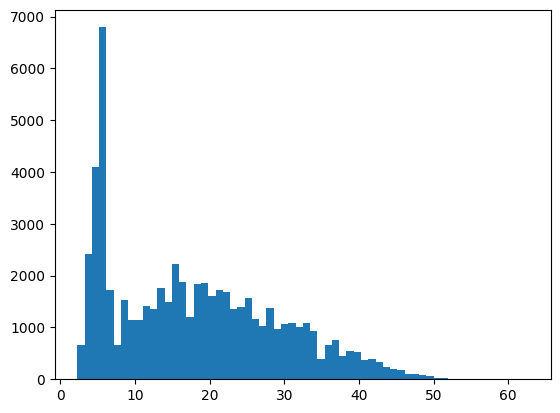

In [29]:
plt.hist(bdf_d['distance'], bins='auto')
plt.show()

In [20]:
# bdf_d['distance'] = dists_from_mean_edf

ValueError: Length of values (9852) does not match length of index (39852)

In [19]:
bdf_d['mass'].fillna(0, inplace=True)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Assuming `bdf_d` is your pandas DataFrame
# Step 1: Extract features and target
X = bdf_d[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']]
y = bdf_d['mass']

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # mass: [139.57 -> 0, 105.65 -> 1]

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Initialize and train XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',       # Log loss is a common evaluation metric for binary classification
    use_label_encoder=False      # Avoid warnings about label encoding
)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Map back predictions to mass values if needed
y_pred_mass = label_encoder.inverse_transform(y_pred)

X_test['mass'] = label_encoder.inverse_transform(y_test)
X_test['mass_reco'] = y_pred_mass

Accuracy: 0.9240040174087714
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      3025
           1       0.91      0.92      0.91      3045
           2       0.91      0.87      0.89      3007
           3       0.98      0.95      0.96      2871

    accuracy                           0.92     11948
   macro avg       0.93      0.92      0.92     11948
weighted avg       0.92      0.92      0.92     11948



In [21]:
bdf_d['mass_reco'] = label_encoder.inverse_transform(model.predict(X))

In [22]:
model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])

array([[4.1439620e-07, 6.7587223e-07, 3.5815701e-05, 9.9996305e-01],
       [9.9622786e-01, 7.1641849e-04, 3.0526242e-03, 3.1420980e-06],
       [5.5038606e-07, 9.8856878e-01, 1.1430060e-02, 6.5885342e-07],
       ...,
       [4.2720001e-07, 9.9848312e-01, 1.5161627e-03, 2.5398828e-07],
       [6.5370109e-06, 3.0303547e-02, 9.6968597e-01, 3.9065335e-06],
       [1.3251698e-05, 7.0278472e-01, 2.9599959e-01, 1.2024002e-03]],
      dtype=float32)

In [23]:
X_test[['bckg_proba', 'mu_proba', 'pi_proba', 'ka_proba']] = model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])

In [24]:
bdf_d[['bckg_proba', 'mu_proba', 'pi_proba', 'ka_proba']] = model.predict_proba(bdf_d[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])

In [39]:
X_test

,momentum,unfixed_calculated_r_2d_4_rsigms_4_tsigms,theta_p,distance,mass,mass_reco,bckg_proba,mu_proba,pi_proba,ka_proba
38845,584.369263,42.831605,0.123649,35.575617,105.650002,105.650002,3.523034e-08,0.999912,0.000088,9.565171e-08
2907,592.646851,33.477884,0.046039,21.660654,139.570007,139.570007,1.297071e-05,0.002244,0.997697,4.555757e-05
59544,691.588501,26.968675,0.600084,5.933149,0.000000,0.000000,9.592238e-01,0.001624,0.039141,1.157063e-05
39502,896.997803,48.628456,0.078629,35.370008,105.650002,105.650002,1.434772e-06,0.992804,0.007191,3.623648e-06
33890,628.356567,54.401187,0.637342,15.925581,105.650002,105.650002,1.052472e-06,0.996212,0.003782,4.853718e-06
...,...,...,...,...,...,...,...,...,...,...
32453,628.118408,48.994161,0.459109,16.806997,105.650002,105.650002,7.751754e-07,0.980038,0.019960,1.504318e-06
2087,575.273010,30.515326,0.202550,16.896703,139.570007,139.570007,9.920271e-06,0.000942,0.999017,3.135561e-05
58308,984.394714,51.803996,0.291200,33.230010,105.650002,105.650002,4.823372e-06,0.985436,0.014548,1.058296e-05
50437,3274.708252,35.957141,0.298693,4.705121,0.000000,0.000000,6.977278e-01,0.000267,0.000624,3.013816e-01


In [84]:
X = bdf_d[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']]
y = bdf_d['mass']
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
y_pred_mass = label_encoder.inverse_transform(y_pred)

X_test['mass'] = label_encoder.inverse_transform(y_test)
X_test['mass_reco'] = y_pred_mass

Accuracy: 0.959
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1312
           1       0.98      0.96      0.97      1380
           2       0.97      0.91      0.94      1308

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [24]:
label_encoder.classes_

array([  0.  , 105.65, 139.57, 493.68], dtype=float32)

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [26]:
momentum_from_beta(beta_from_momentum(1500, 134), 490)

5485.074626865626

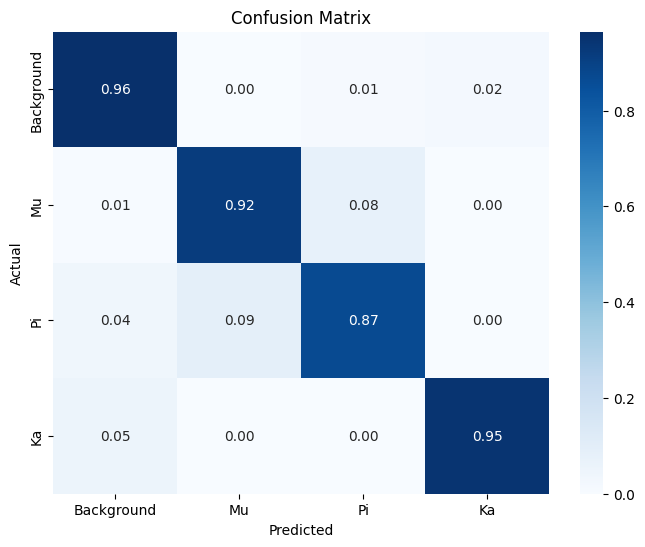

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Background', 'Mu', 'Pi', 'Ka']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

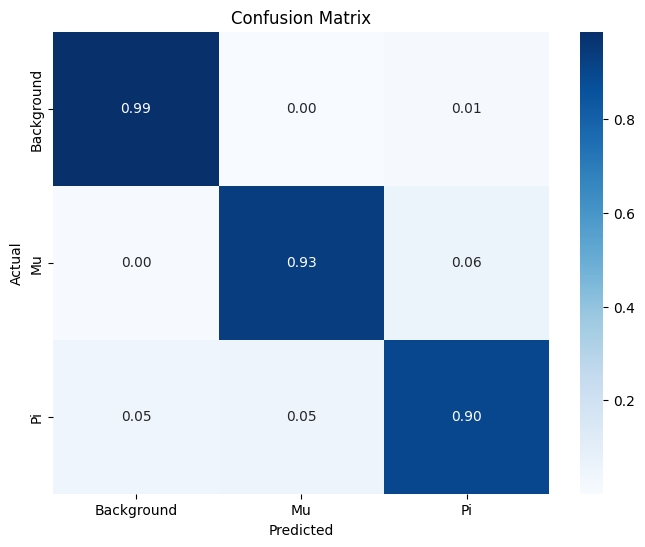

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Background', 'Mu', 'Pi']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

посмотреть как от импульса зависит

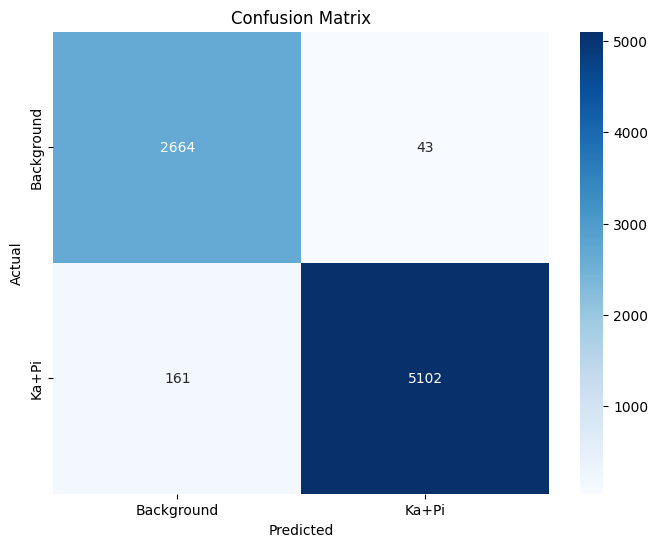

In [26]:
y_true_combined = [0 if y == 0 else 1 for y in y_test]
y_pred_combined = [0 if y == 0 else 1 for y in y_pred]

cm = confusion_matrix(y_true_combined, y_pred_combined)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Background', 'Ka+Pi']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

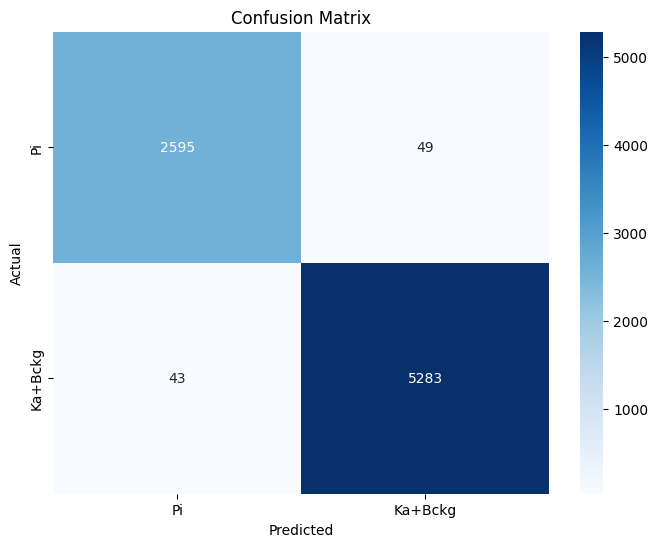

In [27]:
y_true_combined = [0 if y == 1 else 1 for y in y_test]
y_pred_combined = [0 if y == 1 else 1 for y in y_pred]

cm = confusion_matrix(y_true_combined, y_pred_combined)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Pi', 'Ka+Bckg']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
y_test

array([1, 1, 2, ..., 2, 1, 1], dtype=int64)

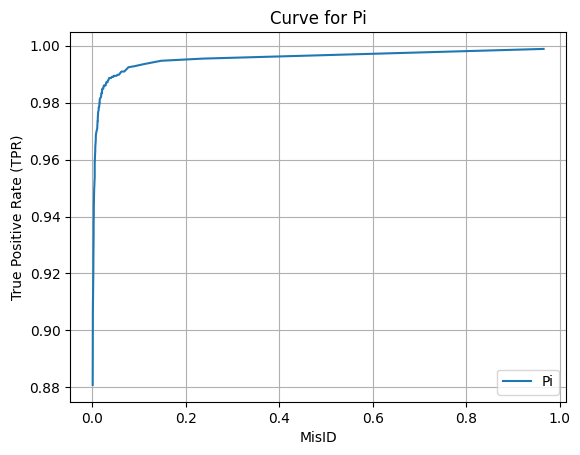

In [68]:
probs = model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])
bounds = np.linspace(0.001, 1, 100)
pi_eff = np.zeros(100)
pi_misid = np.zeros(100)
for i in range(100):
    bound = bounds[i]
    y_pred_bound = probs[:, 1] >= bound  # Ids of events identified as pions
    pi_eff[i] = (y_test[y_pred_bound] == 1).sum() / y_test[y_test == 1].shape[0]
    pi_misid[i] = (y_test[y_pred_bound] != 1).sum() / (y_test[y_pred_bound] == 1).sum()
# plt.plot(bounds, pi_eff, label='pi_eff')
# plt.plot(bounds, pi_misid, label='pi_misid')
plt.plot(pi_misid, pi_eff, label='Pi')
plt.xlabel('MisID')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curve for Pi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

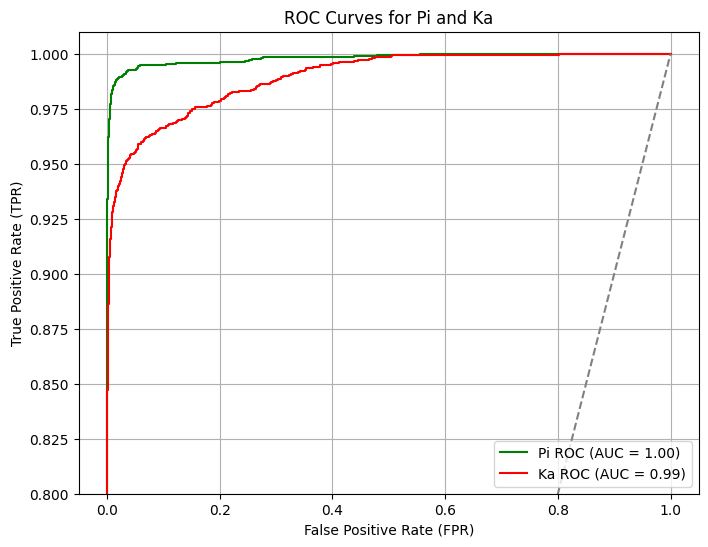

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (pions) and class 2
probs_class_1 = model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])[:, 1]
probs_class_2 = model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])[:, 2]

# Create binary labels for class 1 and class 2
y_binary_class_1 = (y_test == 1).astype(int)
y_binary_class_2 = (y_test == 2).astype(int)

# Compute ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_binary_class_1, probs_class_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Compute ROC curve and AUC for class 2
fpr_2, tpr_2, _ = roc_curve(y_binary_class_2, probs_class_2)
roc_auc_2 = auc(fpr_2, tpr_2)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='g', label=f'Pi ROC (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='r', label=f'Ka ROC (AUC = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Pi and Ka')
plt.ylim([0.8, 1.01])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [47]:
(y_test == y_pred_bound)

array([ True,  True, False, ..., False,  True,  True])

In [44]:
y_test[y_test == 1].sum()

2644

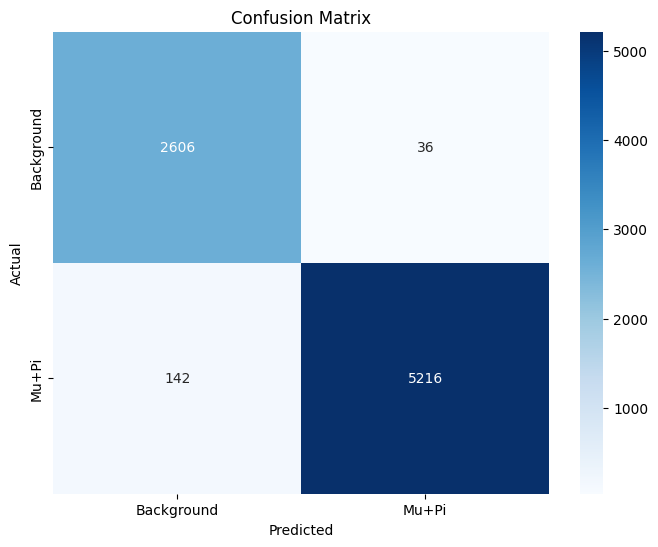

In [26]:
y_true_combined = [0 if y == 0 else 1 for y in y_test]
y_pred_combined = [0 if y == 0 else 1 for y in y_pred]

cm = confusion_matrix(y_true_combined, y_pred_combined)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Background', 'Mu+Pi']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
cm

array([[2606,   36],
       [ 142, 5216]], dtype=int64)

In [28]:
cm[0][1] / (cm[0][1] + cm[0][0]) # noise event reduction

0.00928332714444857

In [29]:
cm[1][1] / (cm[1][1] + cm[1][0]) # efficiency = recall

0.9734697744930831

In [30]:
X_test

,momentum,unfixed_calculated_r_2d_4_rsigms_4_tsigms,theta_p,distance,mass,mass_reco
32823,507.407288,16.887005,0.133825,5.235825,0.000000,0.000000
16298,980.192993,20.468116,0.398078,5.235825,0.000000,0.000000
28505,507.253937,33.981506,0.717551,4.589011,0.000000,0.000000
6689,557.376648,33.936721,0.550582,10.487470,139.570007,139.570007
26893,1594.239258,67.556845,0.766994,14.372736,139.570007,139.570007
...,...,...,...,...,...,...
13618,806.474792,55.559466,0.501060,21.628135,105.650002,105.650002
35165,527.029114,52.614789,0.688381,15.703250,105.650002,105.650002
16359,652.576477,58.757830,0.650476,12.896629,105.650002,105.650002
3842,1496.819702,56.791239,0.406094,32.299976,105.650002,139.570007


посмотреть как себя ведут параметры при одном уровне шума для другого

каоны до той же скорости что и пионы

In [30]:
label_encoder.classes_

array([  0.  , 139.57, 493.68], dtype=float32)

In [34]:
def plot_2d_probas(bdf, num_of_bins=10, momentum_limit=4000):
    # Example DataFrame (replace with actual data)
    # bdf_d = pd.DataFrame({'momentum': ..., 'theta_p': ..., 'mass_calc': ..., 'other_column': ...})
    # bdf_d = bdf[(bdf.mass != 0) & (bdf.mass_reco != 0)]
    bdf_d = bdf[bdf.momentum <= momentum_limit]
    momentum = bdf_d['momentum']
    theta_p = bdf_d['theta_p']
    delim = 200
    # mass_calc = bdf_d['mass_calc']  # Column used for pi_efficiency calculation
    
    # Define the number of bins
    x_bins = num_of_bins  # Number of bins along the x-axis
    y_bins = num_of_bins  # Number of bins along the y-axis
    
    # Define bin edges
    x_edges = np.linspace(momentum.min(), momentum.max(), x_bins + 1)
    y_edges = np.linspace(theta_p.min(), theta_p.max(), y_bins + 1)
    
    # Assign each point to a bin
    x_indices = np.digitize(momentum, x_edges) - 1
    y_indices = np.digitize(theta_p, y_edges) - 1
    
    # Filter valid bins
    valid_mask = (x_indices >= 0) & (x_indices < x_bins) & (y_indices >= 0) & (y_indices < y_bins)
    bdf_d = bdf_d[valid_mask]
    x_indices = x_indices[valid_mask]
    y_indices = y_indices[valid_mask]
    
    # Add bin indices to the DataFrame
    bdf_d['x_bin'] = x_indices
    bdf_d['y_bin'] = y_indices
    
    # Custom function to calculate pi_efficiency
    def calculate_mu_probas(group):
        return group[(group.mass_reco == mu_mass) & (group.mass == mu_mass)].shape[0] / (group[(group.mass_reco == mu_mass)].shape[0] + 1e-6)
    def calculate_pi_probas(group):
        return group[(group.mass_reco == pi_mass) & (group.mass == pi_mass)].shape[0] / (group[(group.mass_reco == pi_mass)].shape[0] + 1e-6)
    def calculate_ka_probas(group):
        return group[(group.mass_reco == ka_mass) & (group.mass == ka_mass)].shape[0] / (group[(group.mass_reco == ka_mass)].shape[0] + 1e-6)
    def calculate_bckg_probas(group):
        return group[(group.mass_reco == 0) & (group.mass == 0)].shape[0] / (group[(group.mass_reco == 0)].shape[0] + 1e-6)
    # Group by bin and calculate pi_efficiency for each bin
    mu_probas = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_mu_probas)
    pi_probas = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_pi_probas)
    ka_probas = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_ka_probas)
    bckg_probas = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_bckg_probas)
 
    # Create a 2D array for pi_efficiency
    mu_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in mu_probas.items():
        mu_efficiency_grid[x_bin, y_bin] = value
        
    pi_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in pi_probas.items():
        pi_efficiency_grid[x_bin, y_bin] = value
        
    ka_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in ka_probas.items():
        ka_efficiency_grid[x_bin, y_bin] = value
        
    bckg_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in bckg_probas.items():
        bckg_efficiency_grid[x_bin, y_bin] = value
    # Plot the 2D histogram with pi_efficiency values
    fig, axs = plt.subplots(1, 4, figsize=(32, 6), constrained_layout=True)  # Create two subplots side by side
    
    # Determine global color scale
    vmin = min(np.nanmin(pi_efficiency_grid), np.nanmin(mu_efficiency_grid), np.nanmin(ka_efficiency_grid))
    vmax = max(np.nanmax(pi_efficiency_grid), np.nanmax(mu_efficiency_grid), np.nanmax(ka_efficiency_grid))
    
    proba_grids = [mu_efficiency_grid, pi_efficiency_grid, ka_efficiency_grid, bckg_efficiency_grid]
    particles = ['Mu', 'Pi', 'Ka', 'Bckg']
    for idx in range(4):  
        proba_grid = proba_grids[idx]
        im = axs[idx].imshow(proba_grid.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], 
                            aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=axs[idx], label='Mean Probability')
        
        # Annotate each bin with the pi_efficiency value
        for i in range(proba_grid.shape[0]):
            for j in range(proba_grid.shape[1]):
                if not np.isnan(proba_grid[i, j]):
                    x_center = (x_edges[i] + x_edges[i + 1]) / 2
                    y_center = (y_edges[j] + y_edges[j + 1]) / 2
                    axs[idx].text(x_center, y_center, f'{proba_grid[i, j]:.2f}', 
                                ha='center', va='center', color='white', fontsize=8)
        
        # Label axes for the first plot
        axs[idx].set_xlabel('Momentum, MeV/c')
        axs[idx].set_ylabel('Theta_p')
        axs[idx].set_title(f'{particles[idx]} Mean Probability')
    

    
    plt.show()
    


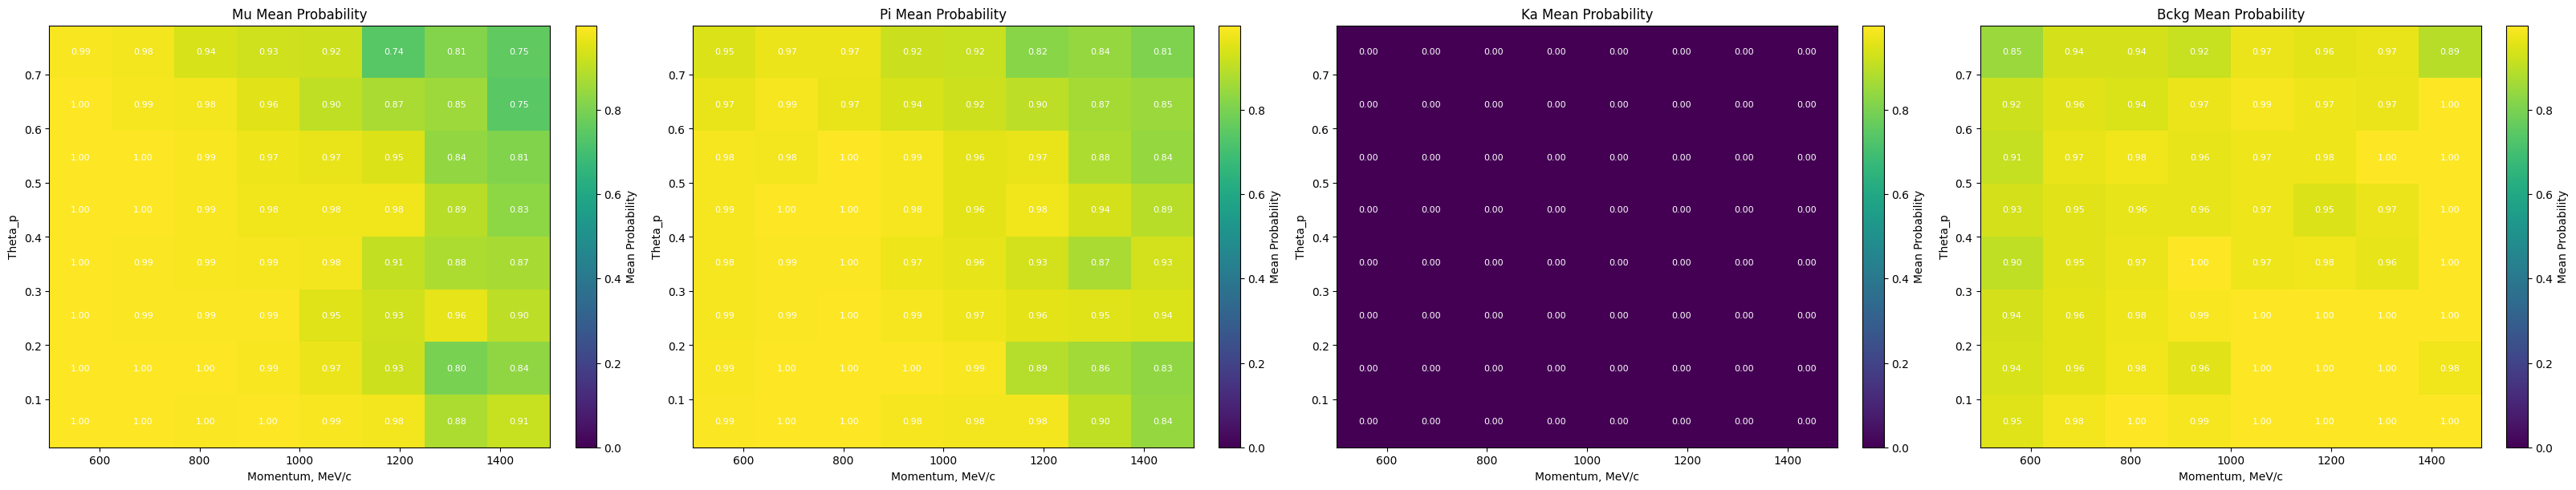

In [35]:
plot_2d_probas(bdf_d, num_of_bins=8, momentum_limit=1500)

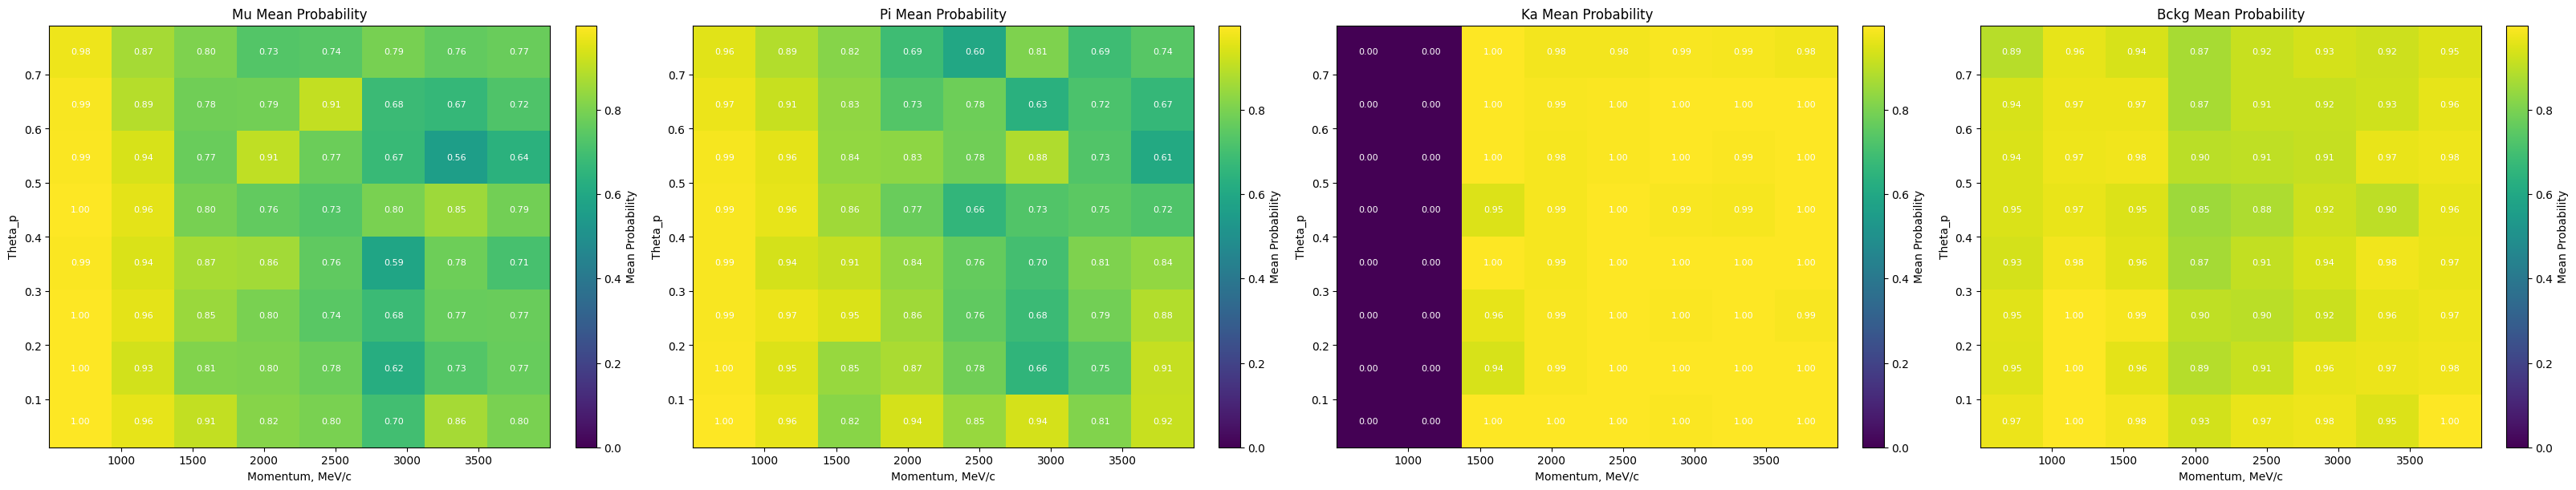

In [36]:
plot_2d_probas(bdf_d, num_of_bins=8, momentum_limit=4000)

In [35]:
bdf_d

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance,mass_reco,bckg_proba,mu_proba,pi_proba,ka_proba
0,493.679993,2713.627686,0.983851,35,6.0,0.443397,0.903299,47.164988,0.984170,0.000319,0.032412,18.070147,493.679993,5.404269e-07,8.356329e-07,0.000096,9.999025e-01
1,0.000000,580.008301,0.972247,0,3.0,0.620127,0.813805,23.732779,0.968827,-0.003420,-0.351774,4.705121,0.000000,9.759654e-01,2.794262e-03,0.021235,5.152388e-06
2,105.650002,509.237579,0.979149,22,5.0,0.107794,0.994196,36.218635,0.977975,-0.001174,-0.119928,30.004823,105.650002,3.936387e-07,9.968807e-01,0.003119,2.528571e-07
3,139.570007,524.362061,0.966354,12,1.0,0.711877,0.757137,36.242987,0.968662,0.002308,0.238856,13.679808,139.570007,1.706202e-05,1.675547e-03,0.998283,2.427253e-05
4,139.570007,823.586365,0.985943,37,7.0,0.092414,0.995733,43.896218,0.986567,0.000624,0.063290,43.077962,139.570007,9.016945e-06,1.861892e-03,0.998113,1.606312e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59732,0.000000,2131.707520,0.974216,0,4.0,0.342334,0.941974,21.152331,0.966159,-0.008057,-0.827006,5.235825,0.000000,9.207136e-01,1.752628e-04,0.000169,7.894166e-02
59733,493.679993,2448.046875,0.980266,17,5.0,0.588201,0.831940,45.669303,0.978164,-0.002102,-0.214476,16.806997,493.679993,5.496187e-07,2.634154e-07,0.000197,9.998022e-01
59734,105.650002,979.055969,0.994228,42,9.0,0.124485,0.992262,50.519435,0.995070,0.000842,0.084680,38.647801,105.650002,2.972410e-07,9.993044e-01,0.000695,5.200490e-07
59735,105.650002,1433.655884,0.997296,62,10.0,0.643587,0.799949,66.790647,0.997432,0.000136,0.013657,16.756146,105.650002,2.471608e-05,8.090808e-01,0.190884,1.037199e-05


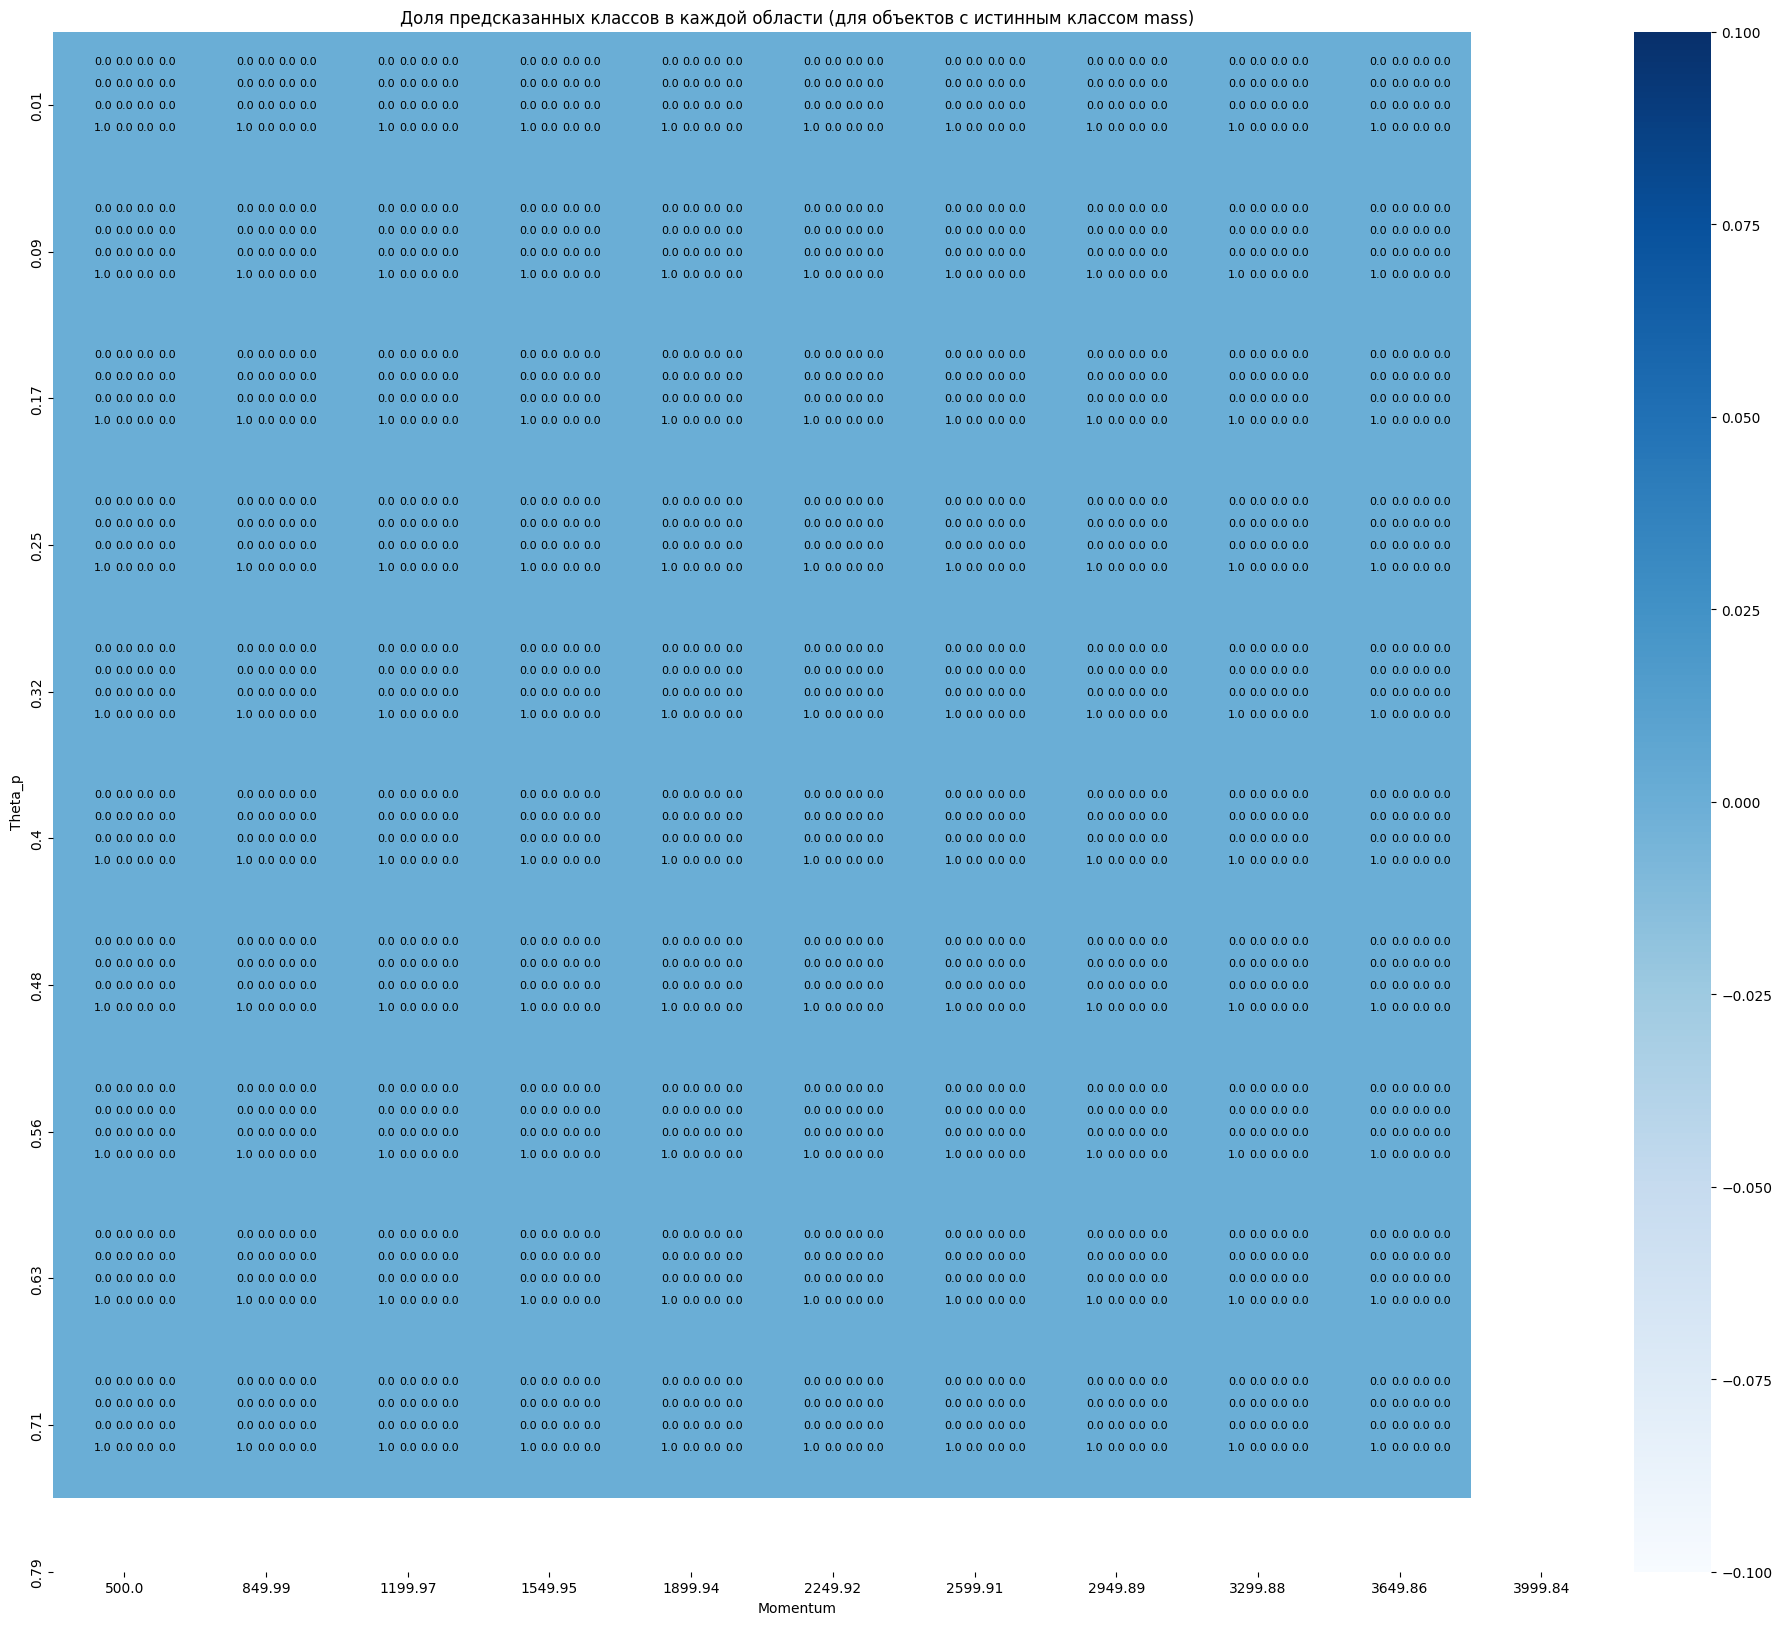

In [39]:

# Определяем классы
mass_values = [0, mu_mass, pi_mass, ka_mass]  # Истинные массы
mass_labels = {m: i for i, m in enumerate(mass_values)}  # Словарь для преобразования масс в индексы

# Разбиение пространства (например, 10x10)
n_bins_x, n_bins_y = 10, 10
x_bins = np.linspace(bdf_d["momentum"].min(), bdf_d["momentum"].max(), n_bins_x+1)
y_bins = np.linspace(bdf_d["theta_p"].min(), bdf_d["theta_p"].max(), n_bins_y+1)

# 4x4 матрицы ошибок в каждом бине
conf_matrices = np.zeros((n_bins_x, n_bins_y, 4, 4))

# Заполняем матрицы ошибок по бинам
for i in range(len(bdf_d)):
    true_mass = bdf_d.iloc[i]["mass"]
    pred_mass = bdf_d.iloc[i]["mass_reco"]

    if true_mass in mass_labels and pred_mass in mass_labels:  # Фильтруем только допустимые значения
        true_idx = mass_labels[true_mass]
        pred_idx = mass_labels[pred_mass]

        x_idx = np.digitize(bdf_d.iloc[i]["momentum"], x_bins) - 1
        y_idx = np.digitize(bdf_d.iloc[i]["theta_p"], y_bins) - 1

        conf_matrices[x_idx, y_idx, true_idx, pred_idx] += 1  # Увеличиваем счетчик в матрице ошибок

# Нормируем матрицы ошибок в каждом бине (по строкам)
for i in range(n_bins_x):
    for j in range(n_bins_y):
        row_sums = conf_matrices[i, j].sum(axis=1, keepdims=True)
        conf_matrices[i, j] = np.divide(conf_matrices[i, j], row_sums, where=row_sums > 0)  # Избегаем деления на 0

# Визуализация
fig, ax = plt.subplots(figsize=(24, 20))
heatmap_data = np.array([[conf_matrices[i, j, 1].sum() for j in range(n_bins_y)] for i in range(n_bins_x)])
sns.heatmap(heatmap_data.T, cmap="Blues", xticklabels=x_bins.round(2), yticklabels=y_bins.round(2), ax=ax, cbar=True)

# Добавляем мини-матрицы в каждую ячейку
for i in range(n_bins_x):
    for j in range(n_bins_y):
        cm = conf_matrices[i, j]  # Локальная матрица ошибок
        x_pos, y_pos = i + 0.5, j + 0.5  # Центр ячейки
        for true_cls in range(4):
            for pred_cls in range(4):
                plt.text(x_pos + (pred_cls - 1) * 0.15, 
                         y_pos - (true_cls - 1) * 0.15, 
                         f"{cm[true_cls, pred_cls]:.1f}",
                         ha="center", va="center", fontsize=8, color="black")

plt.xlabel("Momentum")
plt.ylabel("Theta_p")
plt.title("Доля предсказанных классов в каждой области (для объектов с истинным классом mass)")
plt.show()

In [46]:
def plot_2d_separation_efficiency(bdf, num_of_bins=10):
    # Example DataFrame (replace with actual data)
    # bdf_d = pd.DataFrame({'momentum': ..., 'theta_p': ..., 'mass_calc': ..., 'other_column': ...})
    # bdf_d = bdf[(bdf.mass != 0) & (bdf.mass_reco != 0)]
    bdf_d = bdf
    momentum = bdf_d['momentum']
    theta_p = bdf_d['theta_p']
    delim = 200
    # mass_calc = bdf_d['mass_calc']  # Column used for pi_efficiency calculation
    
    # Define the number of bins
    x_bins = num_of_bins  # Number of bins along the x-axis
    y_bins = num_of_bins  # Number of bins along the y-axis
    
    # Define bin edges
    x_edges = np.linspace(momentum.min(), momentum.max(), x_bins + 1)
    y_edges = np.linspace(theta_p.min(), theta_p.max(), y_bins + 1)
    
    # Assign each point to a bin
    x_indices = np.digitize(momentum, x_edges) - 1
    y_indices = np.digitize(theta_p, y_edges) - 1
    
    # Filter valid bins
    valid_mask = (x_indices >= 0) & (x_indices < x_bins) & (y_indices >= 0) & (y_indices < y_bins)
    bdf_d = bdf_d[valid_mask]
    x_indices = x_indices[valid_mask]
    y_indices = y_indices[valid_mask]
    
    # Add bin indices to the DataFrame
    bdf_d['x_bin'] = x_indices
    bdf_d['y_bin'] = y_indices
    
    # Custom function to calculate pi_efficiency
    def calculate_mu_efficiency(group):
        # Example calculation: mean of mass_calc divided by sum of another column
        return group[(group.mass_reco == pi_mass) & (group.mass == pi_mass)].shape[0] / (group[(group.mass_reco == pi_mass)].shape[0] + 1e-6)
        # return group['mass_calc'].mean() / (group['mass_calc'].sum() + 1e-6)  # Add small constant to avoid division by zero
    
    # Group by bin and calculate pi_efficiency for each bin
    bin_efficiency = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_mu_efficiency)
    
    # Create a 2D array for pi_efficiency
    mu_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in bin_efficiency.items():
        mu_efficiency_grid[x_bin, y_bin] = value
        
    def calculate_pi_efficiency(group):
        # Example calculation: mean of mass_calc divided by sum of another column
        return group[(group.mass_reco == ka_mass) & (group.mass == ka_mass)].shape[0] / (group[(group.mass_reco == ka_mass)].shape[0] + 1e-6)
        # return group['mass_calc'].mean() / (group['mass_calc'].sum() + 1e-6)  # Add small constant to avoid division by zero
    
    # Group by bin and calculate pi_efficiency for each bin
    bin_efficiency = bdf_d.groupby(['x_bin', 'y_bin']).apply(calculate_pi_efficiency)
    
    # Create a 2D array for pi_efficiency
    pi_efficiency_grid = np.full((x_bins, y_bins), np.nan)  # Initialize with NaN for empty bins
    for (x_bin, y_bin), value in bin_efficiency.items():
        pi_efficiency_grid[x_bin, y_bin] = value
    
    # Plot the 2D histogram with pi_efficiency values
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)  # Create two subplots side by side
    
    # Determine global color scale
    vmin = min(np.nanmin(pi_efficiency_grid), np.nanmin(mu_efficiency_grid))
    vmax = max(np.nanmax(pi_efficiency_grid), np.nanmax(mu_efficiency_grid))
    
    # First plot: pi_efficiency
    im1 = axs[0].imshow(pi_efficiency_grid.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], 
                        aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    plt.colorbar(im1, ax=axs[0], label='Efficiency')
    
    # Annotate each bin with the pi_efficiency value
    for i in range(pi_efficiency_grid.shape[0]):
        for j in range(pi_efficiency_grid.shape[1]):
            if not np.isnan(pi_efficiency_grid[i, j]):
                x_center = (x_edges[i] + x_edges[i + 1]) / 2
                y_center = (y_edges[j] + y_edges[j + 1]) / 2
                axs[0].text(x_center, y_center, f'{pi_efficiency_grid[i, j]:.2f}', 
                            ha='center', va='center', color='white', fontsize=8)
    
    # Label axes for the first plot
    axs[0].set_xlabel('Momentum, MeV/c')
    axs[0].set_ylabel('Theta_p')
    axs[0].set_title('2D Histogram with Ka Efficiency')
    
    # Second plot: mu_efficiency
    im2 = axs[1].imshow(mu_efficiency_grid.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], 
                        aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)  # Shared colormap
    plt.colorbar(im2, ax=axs[1], label='Efficiency')
    
    # Annotate each bin with the mu_efficiency value
    for i in range(mu_efficiency_grid.shape[0]):
        for j in range(mu_efficiency_grid.shape[1]):
            if not np.isnan(mu_efficiency_grid[i, j]):
                x_center = (x_edges[i] + x_edges[i + 1]) / 2
                y_center = (y_edges[j] + y_edges[j + 1]) / 2
                axs[1].text(x_center, y_center, f'{mu_efficiency_grid[i, j]:.2f}', 
                            ha='center', va='center', color='white', fontsize=8)
    
    # Label axes for the second plot
    axs[1].set_xlabel('Momentum, MeV/c')
    axs[1].set_ylabel('Theta_p')
    axs[1].set_title('2D Histogram with Pi Efficiency')
    
    plt.show()
    


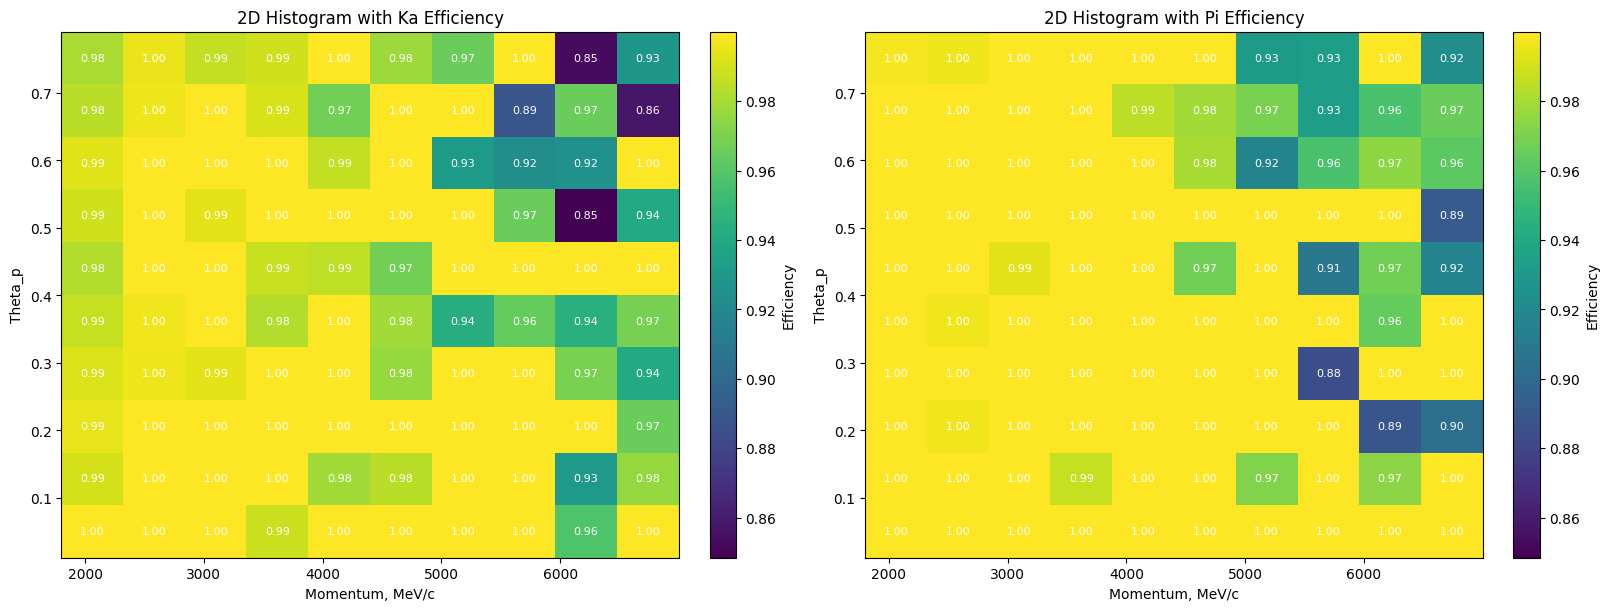

In [47]:
plot_2d_separation_efficiency(bdf_d, 10)

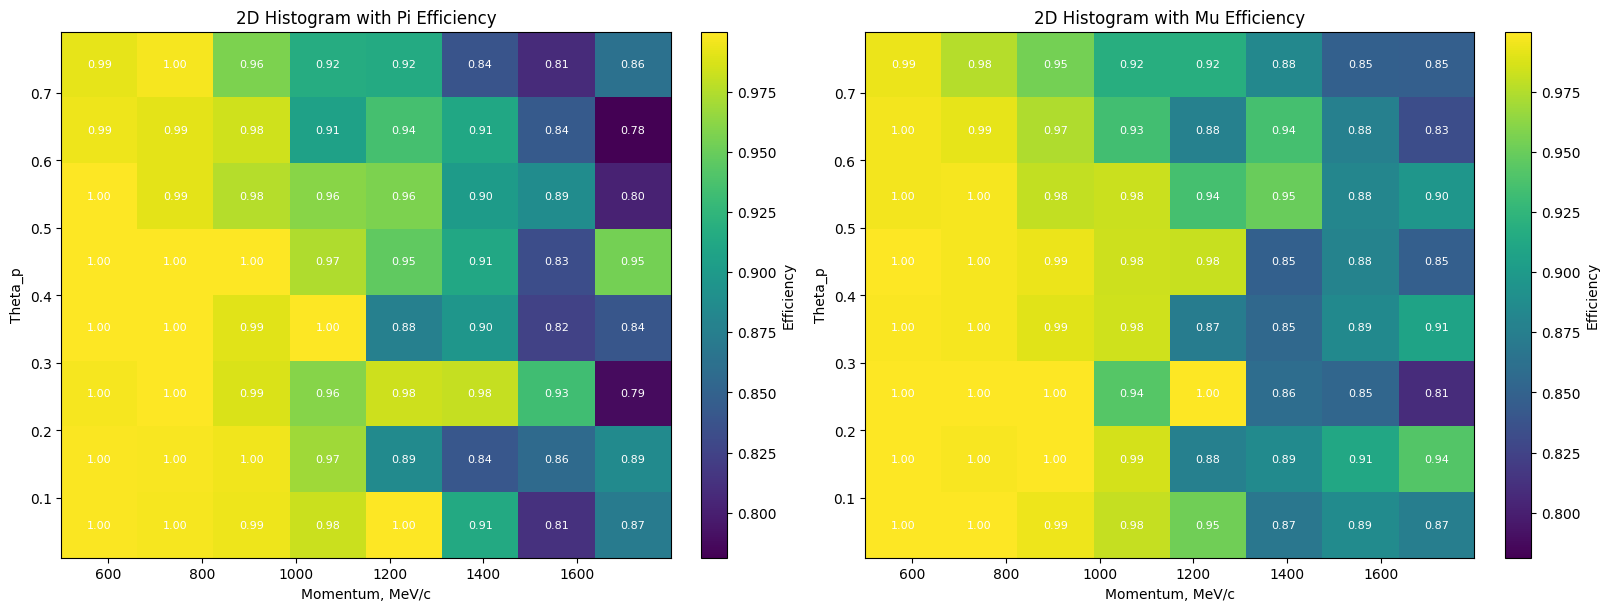

In [45]:
plot_2d_separation_efficiency(bdf_d, 8)

In [9]:
bdf_d['mass_reco'] = bdf_d.momentum / bdf_d.beta_from_calc_r_4_rsigms_4_tsigms * np.sqrt(1 - bdf_d.beta_from_calc_r_4_rsigms_4_tsigms**2)


In [6]:
mass_reco_1e6 = np.array(bdf_d['mass_reco'])

In [10]:
mass_reco_only_1e6 = bdf_d['mass_reco']

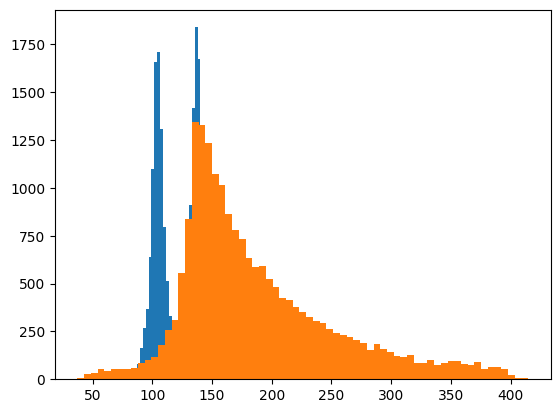

In [12]:
plt.hist(mass_reco_1e6, bins='auto')
plt.hist(mass_reco_only_1e6, bins='auto')
plt.show()

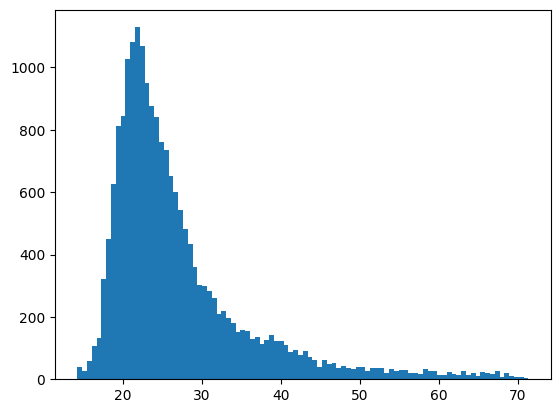

In [18]:
plt.hist(bdf_d.unfixed_calculated_r_2d_4_rsigms_4_tsigms, bins='auto')
plt.show()

In [5]:
event = edf_d.loc[0]

In [57]:
event[event.rotated_r_c < 80]

,x_c,y_c,t_c,x_i,y_i,z_c,mass,true_p,beta,x_p,...,t_c_orig,theta_c,phi_c,recalculated_nx_p,recalculated_ny_p,recalculated_nz_p,theta_p,rotated_r_c,rotated_phi_c,signal_counts
subentry,,,,,,,,,,,,,,,,,,,,,
0,126.400131,-328.160000,3.805307,70.780355,-346.024656,1000.0,105.65,1425.265577,0.997264,0.0,...,3.136319,0.294601,-1.496224,0,0,1,0.33795,58.696069,-2.865251,35
1,79.360131,-291.200000,3.827262,70.780355,-346.024656,1000.0,105.65,1425.265577,0.997264,0.0,...,3.213327,0.281947,-0.388394,0,0,1,0.33795,56.033040,-1.757421,35
2,99.520131,-412.160000,3.840941,70.780355,-346.024656,1000.0,105.65,1425.265577,0.997264,0.0,...,3.079230,0.310770,-2.926517,0,0,1,0.33795,62.128944,1.987641,35
3,109.600131,-402.080000,3.822126,70.780355,-346.024656,1000.0,105.65,1425.265577,0.997264,0.0,...,3.072088,0.300013,-2.726499,0,0,1,0.33795,59.841423,2.187659,35
4,116.320131,-392.000000,3.823435,70.780355,-346.024656,1000.0,105.65,1425.265577,0.997264,0.0,...,3.085251,0.291214,-2.550615,0,0,1,0.33795,57.981362,2.363543,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,142.988214,-355.743141,4.814538,70.780355,-346.024656,1000.0,NaN,1425.265577,0.997264,0.0,...,4.098202,0.346634,-1.910244,0,0,1,0.33795,69.874690,3.003915,35
1723,38.828214,-312.063141,6.871380,70.780355,-346.024656,1000.0,NaN,1425.265577,0.997264,0.0,...,6.250971,0.235280,0.600451,0,0,1,0.33795,46.371824,-0.768575,35
1732,102.668214,-399.423141,6.258693,70.780355,-346.024656,1000.0,NaN,1425.265577,0.997264,0.0,...,5.518413,0.276702,-2.795970,0,0,1,0.33795,54.935053,2.118189,35


In [4]:
beta_from_momentum(7000, 490)

0.9975589671416267

In [5]:
momentum_from_beta(beta_from_momentum(7000, 490), 139)

1985.7142857142758

In [6]:
beta_from_momentum(7000, 139)

0.9998029052236185

# DCR Params Estimation

In [21]:
means_all_dcr = [[], [], [], []]
stds_all_dcr = [[], [], [], []]

In [22]:
r_bins = np.arange(16, 80, step=3.3)

r_bins = np.array([[r_bins[i], r_bins[i + 2]] for i in range(len(r_bins) - 2)])

t_bins = np.arange(0, 7, step=0.25)

t_bins = np.array([[t_bins[i], t_bins[i + 1]] for i in range(len(t_bins) - 1)])

In [23]:
overall_timer_start = perf_counter()
for i, dcr in  enumerate(['1e3', '1e4', '1e5', '1e6']): # ['0', '1e3', '1e4', '1e5', '1e6']
    timer_start = perf_counter()
    edf_d = edf_conc.copy()
    gdf_d = gdf_conc.copy()
    bdf_d = pd.DataFrame()
    edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
    
    edf_d = applySpaceCut(edf_d)
    planeRecalculation(edf_d, idf)
    planeRotation(edf_d)
    edf_d = applySecondSpaceCut(edf_d)
    edf_to_bdf(edf_d.mass, bdf_d)
    edf_to_bdf(edf_d.true_p, bdf_d)
    bdf_d.rename(columns={'true_p': 'momentum'}, inplace=True)
    edf_to_bdf(edf_d.beta, bdf_d)
    recoAngles(edf_d, idf)
    primaryDirectionRecalculation(edf_d)
    
    recoAngles(edf_d, idf, rotation_mode=True)
    
    calculateSignalCounts(edf_d, bdf_d)
    
    for entry, event in edf_d.groupby(level=0):
        data = np.array(event[event.signal == False][['rotated_r_c', 't_c']])
        in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
        in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
        
        # Compute 2D histogram by combining x and y conditions
        hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
        r_bin_centers = r_bins.mean(axis=1)
        hist = hist / r_bin_centers[:, None]
        
        # print(np.std(hist))
        # print(np.mean(hist))
        means_all_dcr[i].append(np.mean(hist))
        stds_all_dcr[i].append(np.std(hist))
        
    print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))
    print('Total Time elapsed: ', round(perf_counter() - overall_timer_start))

    Generate noise with DCR per mm^2 1000.0, mean number of hits per event: 1.75.
Time elapsed on current DCR:  33
Total Time elapsed:  33
    Generate noise with DCR per mm^2 10000.0, mean number of hits per event: 17.50.
Time elapsed on current DCR:  36
Total Time elapsed:  70
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
Time elapsed on current DCR:  54
Total Time elapsed:  124
    Generate noise with DCR per mm^2 1000000.0, mean number of hits per event: 1750.00.
Time elapsed on current DCR:  246
Total Time elapsed:  370


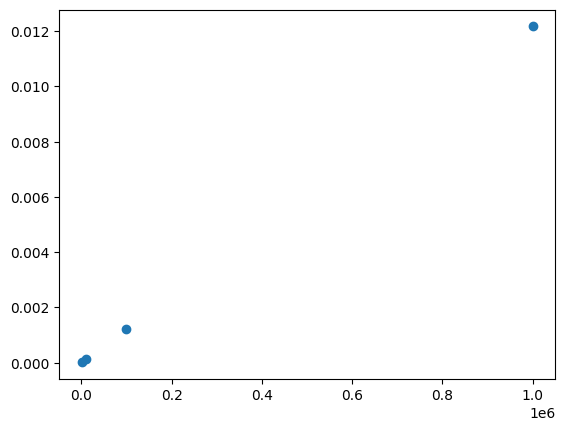

In [29]:
plt.scatter([1e3, 1e4, 1e5, 1e6], [np.mean(means) for means in means_all_dcr])
plt.show()

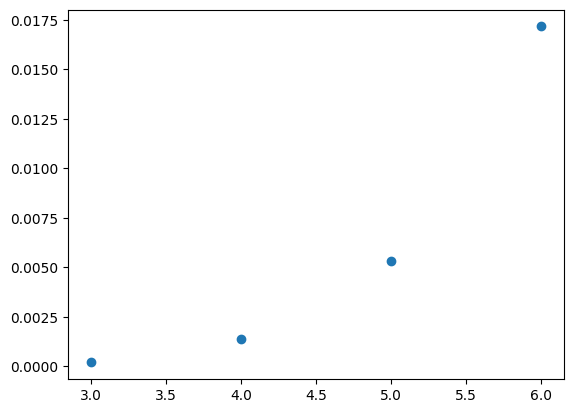

In [31]:
plt.scatter([3, 4, 5, 6], [np.mean(stds) for stds in stds_all_dcr])
plt.show()

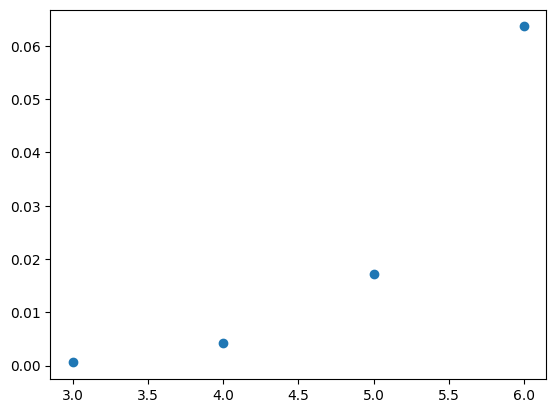

In [33]:
plt.scatter([3, 4, 5, 6], np.array([np.mean(stds) for stds in stds_all_dcr]) * 3 + np.array([np.mean(means) for means in means_all_dcr]))
plt.show()

In [27]:
means = []
stds = []
for entry, event in edf_d.groupby(level=0):
    data = np.array(event[event.signal == False][['rotated_r_c', 't_c']])
    in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
    in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
    
    # Compute 2D histogram by combining x and y conditions
    hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
    r_bin_centers = r_bins.mean(axis=1)
    hist = hist / r_bin_centers[:, None]
    
    # print(np.std(hist))
    # print(np.mean(hist))
    means.append(np.mean(hist))
    stds.append(np.std(hist))
  

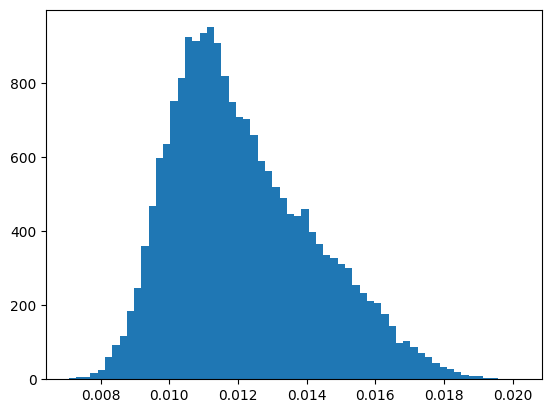

In [16]:
plt.hist(means, bins='auto')
plt.show()

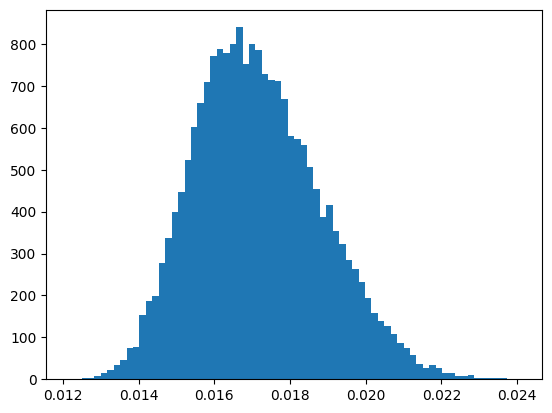

In [17]:
plt.hist(stds, bins='auto')
plt.show()

In [28]:
background_mean = np.mean(means)
background_std = np.mean(stds)

In [27]:
background_std

0.01715621063376994

In [18]:
means_with_signal = []
stds_with_signal = []
for entry, event in edf_d.groupby(level=0):
    data = np.array(event[['rotated_r_c', 't_c']])
    in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
    in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
    
    # Compute 2D histogram by combining x and y conditions
    hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
    r_bin_centers = r_bins.mean(axis=1)
    hist = hist / r_bin_centers[:, None]
    
    # print(np.std(hist))
    # print(np.mean(hist))
    means_with_signal.append(np.mean(hist))
    stds_with_signal.append(np.std(hist))
  

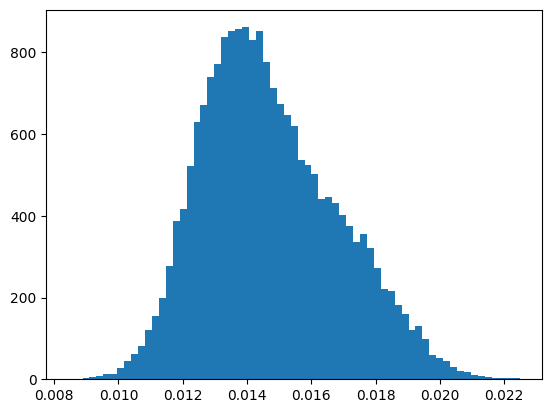

In [19]:
plt.hist(means_with_signal, bins='auto')
plt.show()

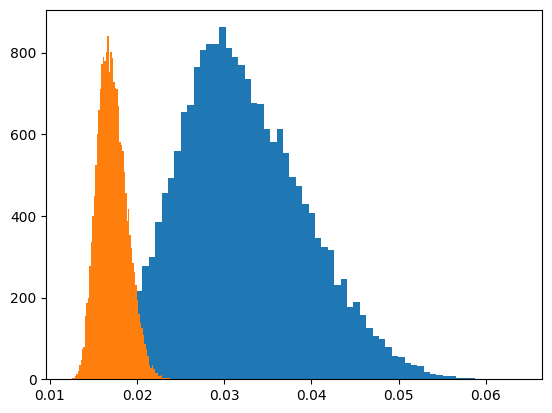

In [32]:
plt.hist(stds_with_signal, bins='auto')
plt.hist(stds, bins='auto')
plt.show()

In [25]:
np.max(hist)

0.2716468590831918

In [23]:
np.unravel_index(np.argmax(hist), hist.shape)

(12, 11)

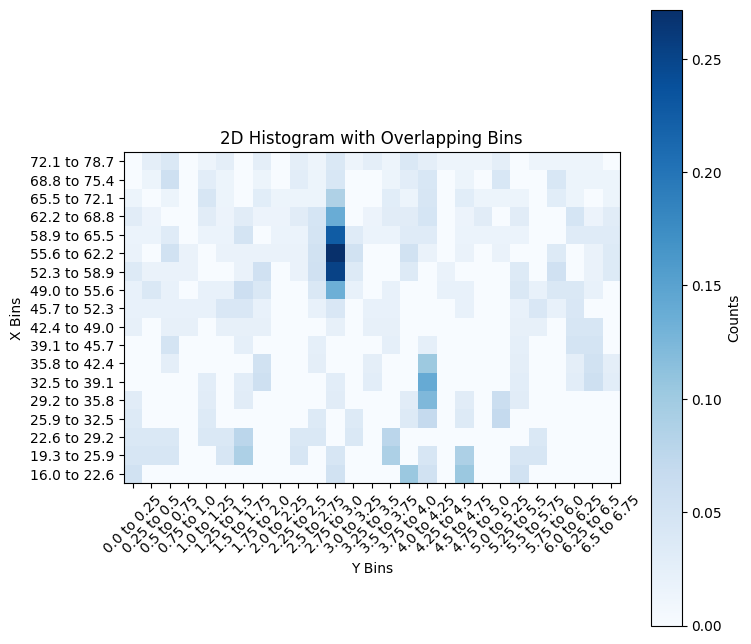

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(hist, interpolation='nearest', cmap='Blues', origin='lower')
plt.colorbar(label="Counts")
plt.xticks(ticks=np.arange(len(t_bins)), labels=[f"{edge[0]} to {edge[1]}" for edge in t_bins], rotation=45)
plt.yticks(ticks=np.arange(len(r_bins)), labels=[f"{round(edge[0], 1)} to {round(edge[1], 1)}" for edge in r_bins])
plt.xlabel("Y Bins")
plt.ylabel("X Bins")
plt.title("2D Histogram with Overlapping Bins")
plt.show()

In [28]:
dists_from_mean = []
# stds_with_signal = []
for entry, event in edf_d.groupby(level=0):
    data = np.array(event[['rotated_r_c', 't_c']])
    in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
    in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
    
    # Compute 2D histogram by combining x and y conditions
    hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
    r_bin_centers = r_bins.mean(axis=1)
    hist = hist / r_bin_centers[:, None]
    
    max_signal = np.max(hist)
    
    dists_from_mean.append(max_signal - background_mean)
    
    # print(np.std(hist))
    # print(np.mean(hist))
    # means_with_signal.append(np.mean(hist))
    # stds_with_signal.append(np.std(hist))
  

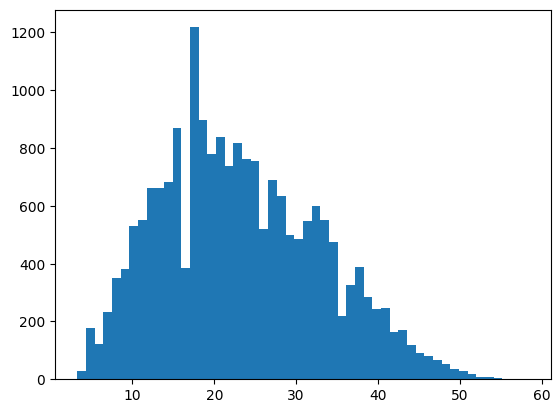

In [30]:
plt.hist(dists_from_mean / background_std, bins='auto')
plt.show()

In [31]:
min(dists_from_mean / background_std)

3.2836337509287037

In [33]:
dists_from_mean_only_background = []
# stds_with_signal = []
for entry, event in edf_d.groupby(level=0):
    data = np.array(event[event.signal == False][['rotated_r_c', 't_c']])
    in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
    in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
    
    # Compute 2D histogram by combining x and y conditions
    hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
    r_bin_centers = r_bins.mean(axis=1)
    hist = hist / r_bin_centers[:, None]
    
    max_signal = np.max(hist)
    
    dists_from_mean_only_background.append(max_signal - background_mean)
    
    # print(np.std(hist))
    # print(np.mean(hist))
    # means_with_signal.append(np.mean(hist))
    # stds_with_signal.append(np.std(hist))
  

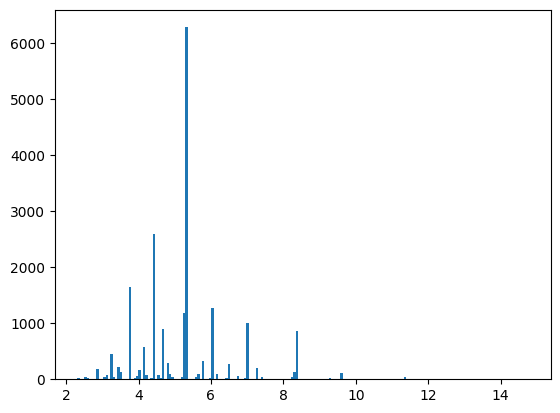

In [34]:
plt.hist(dists_from_mean_only_background / background_std, bins='auto')
plt.show()

либо кат, либо классификация на наличие сигнала

посмотреть соответствуют ли случайные радиусы массовым гипотезам

добавить шум в классификатор

2D Histogram with Overlapping Bins:
[[0.01154145 0.01176166 0.01187824 0.01189637 0.01191969 0.0116658
  0.01184197 0.01170207 0.01198705 0.01179793 0.01169689 0.01156995
  0.01202591 0.01184197 0.01201036 0.0117772  0.01197668 0.01193264
  0.01195078 0.01160363 0.01168394 0.01192746 0.01158549 0.01155699
  0.01172021 0.01181088 0.01159326]
 [0.01151991 0.0114823  0.01172345 0.01185841 0.01164823 0.01163496
  0.01171018 0.01186947 0.01183407 0.01167478 0.01192035 0.0114646
  0.01170133 0.01180088 0.01175442 0.01162389 0.01161504 0.01186504
  0.01170133 0.01160177 0.01155531 0.01162832 0.0115531  0.01138717
  0.01192257 0.01173009 0.01140044]
 [0.01140154 0.01183591 0.01188224 0.01182046 0.01167181 0.0117471
  0.0118417  0.01182239 0.01170656 0.01150386 0.01194595 0.01160811
  0.01172201 0.01188417 0.01171815 0.01172973 0.01159266 0.01177413
  0.01209653 0.01166216 0.01156564 0.01145946 0.01189575 0.01150965
  0.01191313 0.01165058 0.01156757]
 [0.01134589 0.01191096 0.01176712 0.011890

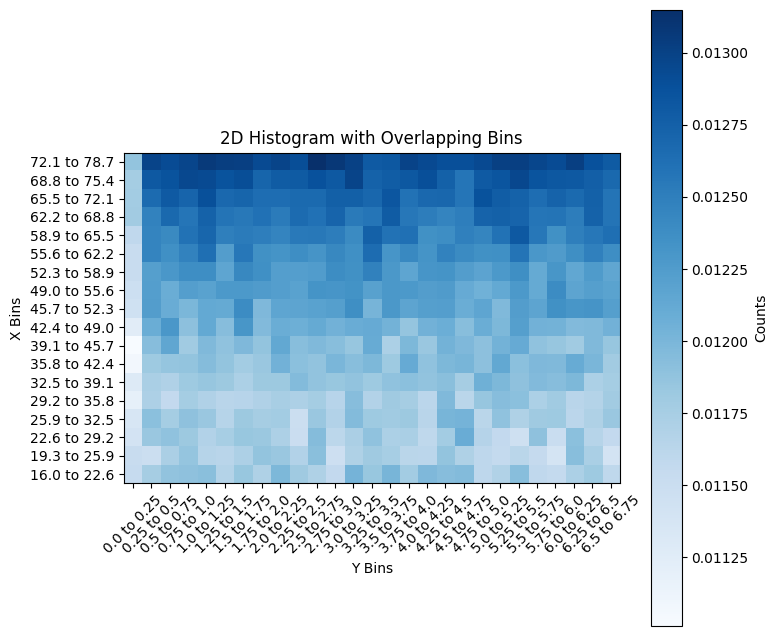

In [83]:
in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])

# Compute 2D histogram by combining x and y conditions
hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
r_bin_centers = r_bins.mean(axis=1)  # Shape: (len(x_bins),)

# Normalize the histogram values by dividing each bin count by its x-coordinate
# Broadcasting is used to divide each row of `hist` by the corresponding x_bin_center
hist = hist / r_bin_centers[:, None] / gdf_d.shape[0]
# Display results
print("2D Histogram with Overlapping Bins:")
print(hist)

# Example visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(hist, interpolation='nearest', cmap='Blues', origin='lower')
plt.colorbar(label="Counts")
plt.xticks(ticks=np.arange(len(t_bins)), labels=[f"{edge[0]} to {edge[1]}" for edge in t_bins], rotation=45)
plt.yticks(ticks=np.arange(len(r_bins)), labels=[f"{round(edge[0], 1)} to {round(edge[1], 1)}" for edge in r_bins])
plt.xlabel("Y Bins")
plt.ylabel("X Bins")
plt.title("2D Histogram with Overlapping Bins")
plt.show()

In [86]:
data = np.array(edf_d[['rotated_r_c', 't_c']])

2D Histogram with Overlapping Bins:
[[0.01154145 0.01176166 0.01198705 0.0121399  0.01224093 0.0119171
  0.01218394 0.01199223 0.01223057 0.01209845 0.0118601  0.01184456
  0.01229275 0.01217358 0.01228238 0.0120544  0.01222798 0.01219948
  0.01217876 0.01181088 0.01195078 0.01220466 0.01176425 0.01158808
  0.01172021 0.01181088 0.01159326]
 [0.01151991 0.0114823  0.01190265 0.01233407 0.01218142 0.01203319
  0.01227655 0.01228761 0.01222566 0.01211726 0.01225    0.01197788
  0.01214381 0.01236062 0.01223673 0.01211283 0.01196903 0.01236504
  0.01211947 0.01200442 0.01201549 0.01209071 0.01186947 0.01142257
  0.01192257 0.01173009 0.01140044]
 [0.01140154 0.01183591 0.0121834  0.01258494 0.01255985 0.01252896
  0.01278958 0.01250386 0.01239189 0.01221622 0.01251158 0.01244595
  0.01249421 0.01281853 0.01260232 0.01258108 0.01232046 0.01260618
  0.01287066 0.01252896 0.01233012 0.01223938 0.01235521 0.01154826
  0.01191313 0.01165058 0.01156757]
 [0.01134589 0.01191096 0.01218493 0.0131

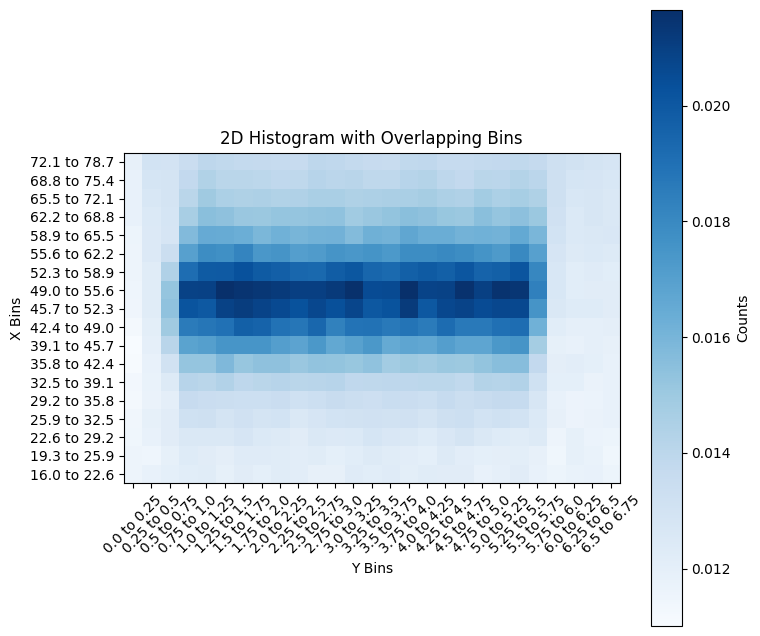

In [87]:
in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])

# Compute 2D histogram by combining x and y conditions
hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
r_bin_centers = r_bins.mean(axis=1)  # Shape: (len(x_bins),)

# Normalize the histogram values by dividing each bin count by its x-coordinate
# Broadcasting is used to divide each row of `hist` by the corresponding x_bin_center
hist = hist / r_bin_centers[:, None] / gdf_d.shape[0]
# Display results
print("2D Histogram with Overlapping Bins:")
print(hist)

# Example visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(hist, interpolation='nearest', cmap='Blues', origin='lower')
plt.colorbar(label="Counts")
plt.xticks(ticks=np.arange(len(t_bins)), labels=[f"{edge[0]} to {edge[1]}" for edge in t_bins], rotation=45)
plt.yticks(ticks=np.arange(len(r_bins)), labels=[f"{round(edge[0], 1)} to {round(edge[1], 1)}" for edge in r_bins])
plt.xlabel("Y Bins")
plt.ylabel("X Bins")
plt.title("2D Histogram with Overlapping Bins")
plt.show()

In [88]:
data = np.array(edf_d[edf_d.signal == True][['rotated_r_c', 't_c']])


2D Histogram with Overlapping Bins:
[[0.00000000e+00 0.00000000e+00 1.08808290e-04 2.43523316e-04
  3.21243523e-04 2.51295337e-04 3.41968912e-04 2.90155440e-04
  2.43523316e-04 3.00518135e-04 1.63212435e-04 2.74611399e-04
  2.66839378e-04 3.31606218e-04 2.72020725e-04 2.77202073e-04
  2.51295337e-04 2.66839378e-04 2.27979275e-04 2.07253886e-04
  2.66839378e-04 2.77202073e-04 1.78756477e-04 3.10880829e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.79203540e-04 4.75663717e-04
  5.33185841e-04 3.98230088e-04 5.66371681e-04 4.18141593e-04
  3.91592920e-04 4.42477876e-04 3.29646018e-04 5.13274336e-04
  4.42477876e-04 5.59734513e-04 4.82300885e-04 4.88938053e-04
  3.53982301e-04 5.00000000e-04 4.18141593e-04 4.02654867e-04
  4.60176991e-04 4.62389381e-04 3.16371681e-04 3.53982301e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.01158301e-04 7.64478764e-04
  8.88030888e-04 7.81853282e-04 9.47876448e-04 6.81467181e-04


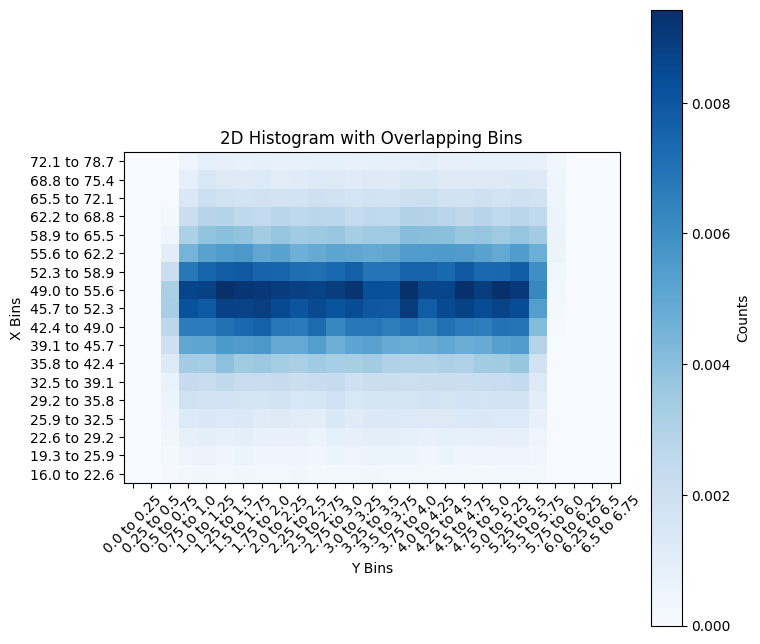

In [90]:
in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])

# Compute 2D histogram by combining x and y conditions
hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
r_bin_centers = r_bins.mean(axis=1)  # Shape: (len(x_bins),)

# Normalize the histogram values by dividing each bin count by its x-coordinate
# Broadcasting is used to divide each row of `hist` by the corresponding x_bin_center
hist = hist / r_bin_centers[:, None] / gdf_d.shape[0]
# Display results
print("2D Histogram with Overlapping Bins:")
print(hist)

# Example visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(hist, interpolation='nearest', cmap='Blues', origin='lower')
plt.colorbar(label="Counts")
plt.xticks(ticks=np.arange(len(t_bins)), labels=[f"{edge[0]} to {edge[1]}" for edge in t_bins], rotation=45)
plt.yticks(ticks=np.arange(len(r_bins)), labels=[f"{round(edge[0], 1)} to {round(edge[1], 1)}" for edge in r_bins])
plt.xlabel("Y Bins")
plt.ylabel("X Bins")
plt.title("2D Histogram with Overlapping Bins")
plt.show()

In [68]:
def ring_area(r1, r2):
    return np.pi * (r2**2 - r1**2)

In [75]:
r_bins

array([[16. , 22.6],
       [19.3, 25.9],
       [22.6, 29.2],
       [25.9, 32.5],
       [29.2, 35.8],
       [32.5, 39.1],
       [35.8, 42.4],
       [39.1, 45.7],
       [42.4, 49. ],
       [45.7, 52.3],
       [49. , 55.6],
       [52.3, 58.9],
       [55.6, 62.2],
       [58.9, 65.5],
       [62.2, 68.8],
       [65.5, 72.1],
       [68.8, 75.4],
       [72.1, 78.7]])

In [72]:
((r_bins[:,0] + r_bins[:,1]) / 2)

array([19.3, 22.6, 25.9, 29.2, 32.5, 35.8, 39.1, 42.4, 45.7, 49. , 52.3,
       55.6, 58.9, 62.2, 65.5, 68.8, 72.1, 75.4])

In [84]:
ring_area(r_bins[:,0], r_bins[:,1]) * 1e6 * 1e-9 * 0.25 

array([0.20008804, 0.23429998, 0.26851192, 0.30272387, 0.33693581,
       0.37114776, 0.4053597 , 0.43957164, 0.47378359, 0.50799553,
       0.54220748, 0.57641942, 0.61063136, 0.64484331, 0.67905525,
       0.7132672 , 0.74747914, 0.78169108])

In [85]:
ring_area(r_bins[:,0], r_bins[:,1]) * 1e6 * 1e-9 * 0.25 / ((r_bins[:,0] + r_bins[:,1]) / 2)

array([0.01036726, 0.01036726, 0.01036726, 0.01036726, 0.01036726,
       0.01036726, 0.01036726, 0.01036726, 0.01036726, 0.01036726,
       0.01036726, 0.01036726, 0.01036726, 0.01036726, 0.01036726,
       0.01036726, 0.01036726, 0.01036726])